# E-Commerce Data Analysis

In [99]:
# Import libraries
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
sns.set()
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.table import Table
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import dash
from dash import dcc, html
import plotly.express as px
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import matplotlib.ticker as ticker

In [100]:
# Downlaod Dataset from https://archive.ics.uci.edu/dataset/352/online+retail

In [101]:
# Load the data
df_sales = pd.read_excel('/Users/moni/DS - Karan/Week3/Data/Online Retail.xlsx')
df_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [102]:
# Set the maximum number of columns and maximum column width
pd.set_option('display.expand_frame_repr', True)

In [103]:
# About the data set:
# This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based
# and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [104]:
# Dataframe discription
print(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [105]:
# Variables Table:
# InvoiceNo - Categorical: a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation
# StockCode	ID - Categorical: a 5-digit integral number uniquely assigned to each distinct product
# Description - Feature	Categorical: product name
# Quantity - Feature Integer: the quantities of each product (item) per transaction
# InvoiceDate - Feature	Date: the day and time when each transaction was generated
# UnitPrice - Feature Continuous: product price per unit sterling
# CustomerID - Feature	Categorical: a 5-digit integral number uniquely assigned to each customer
# Country - Feature	Categorical: the name of the country where each customer resides

In [106]:
# Summary statistics
pd.set_option('display.expand_frame_repr', False)
print(df_sales.describe())

            Quantity                    InvoiceDate      UnitPrice     CustomerID
count  541909.000000                         541909  541909.000000  406829.000000
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   15287.690570
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   12346.000000
25%         1.000000            2011-03-28 11:34:00       1.250000   13953.000000
50%         3.000000            2011-07-19 17:17:00       2.080000   15152.000000
75%        10.000000            2011-10-19 11:27:00       4.130000   16791.000000
max     80995.000000            2011-12-09 12:50:00   38970.000000   18287.000000
std       218.081158                            NaN      96.759853    1713.600303


## Data Cleaning

In [107]:
# Find missing values
df_sales.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [108]:
# Find missing values percentage
missing_percentage = df_sales.isnull().sum() / df_sales.shape[0] * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [109]:
# Approximately 25% of customer dataset entries are undefined, presenting a significant anomaly warranting further inverstigation.
# Additionally, there is a 0.2% incidence of absent descriptions whithin the dataset, indicating potenial daza quality issues that may
# impact the integrity of analytics outcomes.

In [110]:
# Problems to solve and questions to ask in Data Cleaning:
# 1- UnitPrice hase Negative and zero values, what does it mean?
# 2_ There are 1454 Missing values in Description, can we igonore it? (Do we need this Column?)
# 3_ There are 135080 Missing values in CustomerID column, what is the best approch here?

In [111]:
# Find rows with missing values
rows_with_missing_values = df_sales[df_sales.isnull().any(axis=1)]

# Display the rows with missing values
print(rows_with_missing_values)

       InvoiceNo StockCode                      Description  Quantity         InvoiceDate  UnitPrice  CustomerID         Country
622       536414     22139                              NaN        56 2010-12-01 11:52:00       0.00         NaN  United Kingdom
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1 2010-12-01 14:32:00       2.51         NaN  United Kingdom
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2 2010-12-01 14:32:00       2.51         NaN  United Kingdom
1445      536544     21786               POLKADOT RAIN HAT          4 2010-12-01 14:32:00       0.85         NaN  United Kingdom
1446      536544     21787            RAIN PONCHO RETROSPOT         2 2010-12-01 14:32:00       1.66         NaN  United Kingdom
...          ...       ...                              ...       ...                 ...        ...         ...             ...
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5 2011-12-09 10:26:00       4

In [112]:
#--------------------------------------------------Description--------------------------------------------------
# At first, I try to fill the missing values in Description based on the StockCode Column:
# create a copy from the data frame:
df_sales_copy = df_sales.copy()
def fill_description(group):
    # Use forward fill (ffill) to fill NaN values
    return group.ffill()

# Apply the fill_description function to fill NaN values
df_sales_copy['Description'] = df_sales_copy.groupby('StockCode')['Description'].transform(fill_description)

# Display the updated DataFrame
print(df_sales_copy)



       InvoiceNo StockCode                          Description  Quantity         InvoiceDate  UnitPrice  CustomerID         Country
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00       2.55     17850.0  United Kingdom
1         536365     71053                  WHITE METAL LANTERN         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00       2.75     17850.0  United Kingdom
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom
...          ...       ...                                  ...       ...                 ...        ...         ...             ...
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS      

In [113]:
# Check the missing values
df_sales_copy.isnull().sum()

InvoiceNo           0
StockCode           0
Description       185
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [114]:
# Check if it is correct:
filtered_rows = df_sales_copy[df_sales_copy['StockCode'] == 85175]
print(filtered_rows)

       InvoiceNo StockCode            Description  Quantity         InvoiceDate  UnitPrice  CustomerID         Country
3278      536617     85175  CACTI T-LIGHT CANDLES        96 2010-12-02 10:17:00       0.42     13941.0  United Kingdom
4881     C536815     85175  CACTI T-LIGHT CANDLES        -1 2010-12-02 17:05:00       0.42     14443.0  United Kingdom
7239      537023     85175  CACTI T-LIGHT CANDLES        32 2010-12-03 16:02:00       0.42     16725.0  United Kingdom
7439     C537039     85175  CACTI T-LIGHT CANDLES        -1 2010-12-05 10:25:00       0.42     15708.0  United Kingdom
7729      537051     85175  CACTI T-LIGHT CANDLES        32 2010-12-05 11:12:00       0.42     15708.0  United Kingdom
...          ...       ...                    ...       ...                 ...        ...         ...             ...
504398    578949     85175  CACTI T-LIGHT CANDLES        16 2011-11-27 14:30:00       0.42     14954.0  United Kingdom
505056    578999     85175  CACTI T-LIGHT CANDLE

In [115]:
# Now check how many of 185 remaining missing values are unique:
# Filter rows where Description column is NaN and get unique values in StockCode
unique_stock_codes_with_nan_description = df_sales_copy[df_sales_copy['Description'].isna()]['StockCode'].unique()

# Display the unique stock codes
print(len(unique_stock_codes_with_nan_description))

176


In [116]:
# That means almost all of remaining missing Values in Description are unique, but since we use this Column for plots
# labels, I think we don't need to drop them, instead considering their amount comparing the whole data set, I fill their 
# values with UNKNOWN DESCRIPTION

In [117]:
df_sales_copy['Description'] = df_sales_copy['Description'].fillna('UNKNOWN')

In [118]:
# Check again the missing valuse
df_sales_copy.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [119]:
#--------------------------------------------------Customer_ID--------------------------------------------------

In [120]:
df_sales_copy.loc[df_sales_copy.CustomerID.isnull(), ["UnitPrice", "Quantity"]].describe()

,UnitPrice,Quantity
count,135080.000000,135080.000000
mean,8.076577,1.995573
std,151.900816,66.696153
min,-11062.060000,-9600.000000
25%,1.630000,1.000000
50%,3.290000,1.000000
75%,5.450000,3.000000
max,17836.460000,5568.000000


In [121]:
# The price and the quantities of entries without a customer ID can show extreme outliers. 
# As we might want to create features later on that are based on historical prices and sold quantities, this is very disruptive. 
# Why is it possible for a transaction to be without a customer ID. 
# Perhaps you can purchase as a guest but then it would of a good and clean style to plugin a special ID that indicates 
# that this one is a guest.

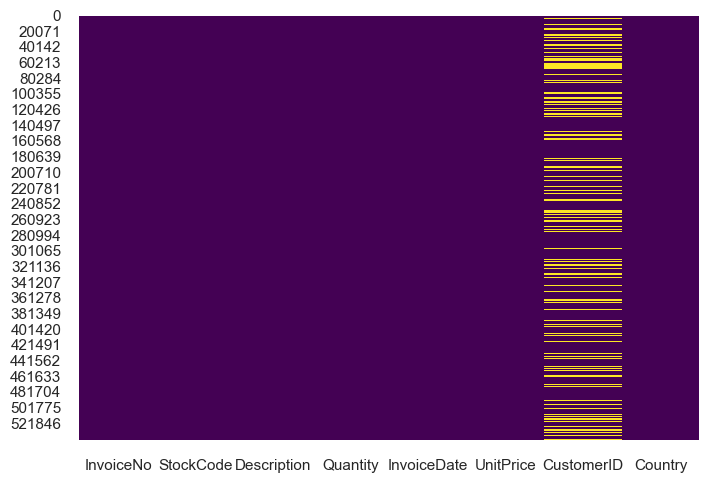

In [122]:
# Find patterns in Customer_ID missing values
sns.heatmap(df_sales_copy.isnull(), cbar=False, cmap='viridis')
plt.show()

In [123]:
df_sales_copy['Missing_Customer_ID'] = df_sales_copy['CustomerID'].isnull()
df_sales_copy.groupby(['InvoiceDate'])['Missing_Customer_ID'].mean()

InvoiceDate
2010-12-01 08:26:00    0.0
2010-12-01 08:28:00    0.0
2010-12-01 08:34:00    0.0
2010-12-01 08:35:00    0.0
2010-12-01 08:45:00    0.0
                      ... 
2011-12-09 12:23:00    0.0
2011-12-09 12:25:00    0.0
2011-12-09 12:31:00    0.0
2011-12-09 12:49:00    0.0
2011-12-09 12:50:00    0.0
Name: Missing_Customer_ID, Length: 23260, dtype: float64

In [124]:
# I tested with combination of subset of features: Country, InvoiceDate, StockCode
# It seems there is not any pattern for the missing values

In [125]:
df_sales_copy = df_sales_copy.drop('Missing_Customer_ID', axis=1)

In [126]:
#--------------------------------------------UnitPrice & Quantity--------------------------------------------

In [127]:
# A zero value in the "UnitPrice" column could have several interpretations, and its meaning might depend on the context and specific
# business rules. Some possible reasons for having a zero value in the "UnitPrice" column:
# Data Entry Error: It could be a data entry error or oversight. The person entering the data might have forgotten to input the correct
# unit price, resulting in a default or placeholder value of zero.
# Free or Complimentary Items: In some cases, businesses may give away items for free or provide complimentary products or services. 
# In such cases, the unit price for these items might be recorded as zero.
# Discounts or Promotions: Zero unit prices might be used to represent items that are part of a promotion or discount, where customers 
# receive certain items at no cost or a reduced price.
# Data Anomalies or Issues: It could be an anomaly or issue in the data. For example, if the dataset is merged from multiple sources, 
# discrepancies in unit prices might lead to zero values.
# Missing Data:In some cases, missing data might be represented as zeros. This might happen if the dataset is generated automatically, 
# and missing values are filled with default values.

In [128]:
# Find the number of rows with zero or negative values in 'UnitPrice'
rows_with_zero_or_negative_UnitPrice = df_sales_copy[df_sales_copy['UnitPrice'] <= 0]

# Display the count of rows
count_rows_with_zero_or_negative = len(rows_with_zero_or_negative_UnitPrice)
print(f'Number of rows with zero or negative values in UnitPrice: {count_rows_with_zero_or_negative}')

Number of rows with zero or negative values in UnitPrice: 2517


In [129]:
# Try to find a pattern
# Descriptive Statistics:
descriptive_stats = df_sales_copy[df_sales_copy['UnitPrice'] == 0].describe()
print(descriptive_stats)

           Quantity                    InvoiceDate  UnitPrice    CustomerID
count   2515.000000                           2515     2515.0     40.000000
mean     -53.421074  2011-06-06 21:13:36.500994048        0.0  14217.225000
min    -9600.000000            2010-12-01 11:52:00        0.0  12415.000000
25%      -32.000000            2011-03-18 11:02:00        0.0  12722.750000
50%       -1.000000            2011-05-23 15:30:00        0.0  13985.000000
75%        3.000000            2011-09-19 16:58:00        0.0  15225.500000
max    12540.000000            2011-12-08 15:24:00        0.0  18059.000000
std      540.206783                            NaN        0.0   1676.321178


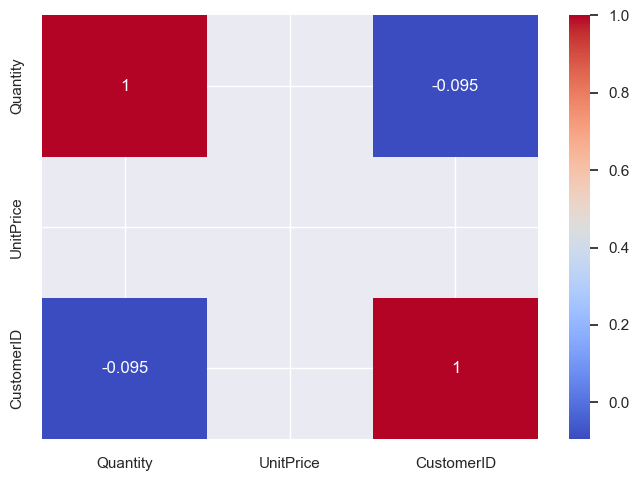

In [130]:
# Correlation Analysis:
numeric_columns = df_sales_copy[df_sales_copy['UnitPrice'] == 0].select_dtypes(include='number')
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [131]:
unique_stock_codes_with_zero_price = df_sales_copy[df_sales_copy['UnitPrice'] == 0]['StockCode'].nunique()

print(f'Number of unique StockCodes with UnitPrice equal to zero: {unique_stock_codes_with_zero_price}')

Number of unique StockCodes with UnitPrice equal to zero: 1419


In [132]:
unique_InvoiceDate_with_zero_price = df_sales_copy[df_sales_copy['UnitPrice'] == 0]['InvoiceDate'].nunique()

print(f'Number of unique InvoiceDate with UnitPrice equal to zero: {unique_InvoiceDate_with_zero_price}')

Number of unique InvoiceDate with UnitPrice equal to zero: 1722


In [133]:
unique_combinations_with_zero_price = df_sales_copy[df_sales_copy['UnitPrice'] == 0][['StockCode', 'InvoiceNo']].drop_duplicates().shape[0]

print(f'Number of unique combinations of StockCode and InvoiceNo with UnitPrice equal to zero: {unique_combinations_with_zero_price}')

Number of unique combinations of StockCode and InvoiceNo with UnitPrice equal to zero: 2506


In [134]:
# It seems there is not any pattern in Unit Price Missing values

In [135]:
# Find the number of rows with zero or negative values in 'UnitPrice'
rows_with_zero_or_negative_Quantity = df_sales_copy[df_sales_copy['Quantity'] <= 0]

# Display the count of rows
count_rows_with_zero_or_negative = len(rows_with_zero_or_negative_Quantity)
print(f'Number of rows with zero or negative values in Quantity: {count_rows_with_zero_or_negative}')

Number of rows with zero or negative values in Quantity: 10624


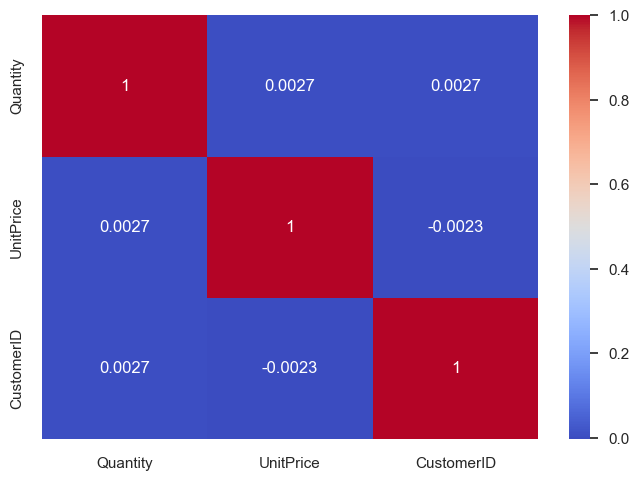

In [136]:
# Correlation Analysis:
numeric_columns = df_sales_copy[df_sales_copy['Quantity'] <= 0].select_dtypes(include='number')
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [137]:
# I took a look at the Description Column in rows with Negative values for Quanitity, some of them:
# throw away, Unsaleable, destroyed, wrongly marked, incorrect stock entry, mouldy, thrown away, thrown away-can't sell,
# damages wax, damages/credits from ASOS, lost?? ... 
# they seems to be some rows to correct the finance sheets and have no effect on our analysis, and also there is not any 
# correlation between them and other features. Therefor I drop rows with 0 and negative Quantities.

In [138]:
df_sales_2 = df_sales_copy[df_sales_copy['Quantity'] > 0]

In [139]:
rows_with_zero_or_negative_Quantity = df_sales_2[df_sales_2['Quantity'] <= 0]

# Display the count of rows
count_rows_with_zero_or_negative = len(rows_with_zero_or_negative_Quantity)
print(f'Number of rows with zero or negative values in Quantity: {count_rows_with_zero_or_negative}')

Number of rows with zero or negative values in Quantity: 0


In [140]:
# And now drop the remaining rows with negative and zero values in unit price
df_sales_3 = df_sales_2[df_sales_2['UnitPrice'] > 0]
rows_with_zero_or_negative_UnitPrice = df_sales_3[df_sales_3['UnitPrice'] <= 0]

# Display the count of rows
count_rows_with_zero_or_negative = len(rows_with_zero_or_negative_UnitPrice)
print(f'Number of rows with zero or negative values in UnitPrice: {count_rows_with_zero_or_negative}')

Number of rows with zero or negative values in UnitPrice: 0


In [141]:
#--------------------------------------------------Date Conversion--------------------------------------------------

In [142]:
df_sales_3["InvoiceDate"] = pd.to_datetime(df_sales_3.InvoiceDate, cache=True)
df_sales_3.InvoiceDate.max() - df_sales_3.InvoiceDate.min()

/var/folders/c4/tjn2zmld3x5g9_yb6901vq4m0000gn/T/ipykernel_7663/215399965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_3["InvoiceDate"] = pd.to_datetime(df_sales_3.InvoiceDate, cache=True)


Timedelta('373 days 04:24:00')

In [143]:
print("Datafile starts with timepoint {}".format(df_sales_3.InvoiceDate.min()))
print("Datafile ends with timepoint {}".format(df_sales_3.InvoiceDate.max()))

Datafile starts with timepoint 2010-12-01 08:26:00
Datafile ends with timepoint 2011-12-09 12:50:00


In [144]:
#--------------------------------------------------Duplicate values--------------------------------------------------

In [145]:
df_sales_3.loc[df_sales_3.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [146]:
# Find duplicate rows based on both 'InvoiceNo' and 'StockCode'
duplicate_rows = df_sales_3[df_sales_3.duplicated(subset=['InvoiceNo', 'StockCode'], keep=False)]

# Group by 'InvoiceNo' and 'StockCode' and count occurrences
grouped_duplicates = duplicate_rows.groupby(['InvoiceNo', 'StockCode']).size().reset_index(name='Count')

# Display the grouped duplicate rows
print("Grouped Duplicate Rows:")
print(grouped_duplicates)

Grouped Duplicate Rows:
      InvoiceNo StockCode  Count
0        536381     71270      2
1        536409     21866      2
2        536409     22111      2
3        536409     22866      2
4        536409     22900      2
...         ...       ...    ...
9561     581538     23318      2
9562     581538     23343      2
9563     581538     23349      2
9564     581538     84380      2
9565     581538    35004B      2

[9566 rows x 3 columns]


In [147]:
df_sales_3[(df_sales_3['InvoiceNo'] == 536381) & (df_sales_3['StockCode'] == 71270)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
113,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom


In [148]:
df_sales_3[(df_sales_3['InvoiceNo'] == 536409) & (df_sales_3['StockCode'] == 21866)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom


In [149]:
# I can't decide to drop the duplicate values, in the first sample there is a difference in Quantity
# but in the secound one It seems that they are exact the same rows, the same date, ... ????
# I think it is the best approach to drop the duplicate values which have the exact the same date, invoice, satckCode and quantity

In [150]:
df_sales_3 = df_sales_3.drop_duplicates(subset=['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate'])

In [151]:
# I decided to take this approach:
# For Product Analysis I ignore the missing values in CustomerID --> df_products
# For Cutomer Analysis, as I don't know why customers or descriptions are missing and we have seen strange outliers in quantities 
# and prices as well as zero-prices I will drop the missing values --> df_customers

In [152]:
# Export to Excel to use in tableau
df_sales_3.to_excel('clean_sale_data.xlsx', index=False)

In [153]:
df_products=df_sales_3.copy()

In [154]:
df_customers=df_sales_3.copy()
df_customers.dropna(subset=['CustomerID'], inplace=True)
df_customers.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [155]:
#--------------------------------------------------------------------------------------------------------------------

## Analayzing

### - Product Analysis

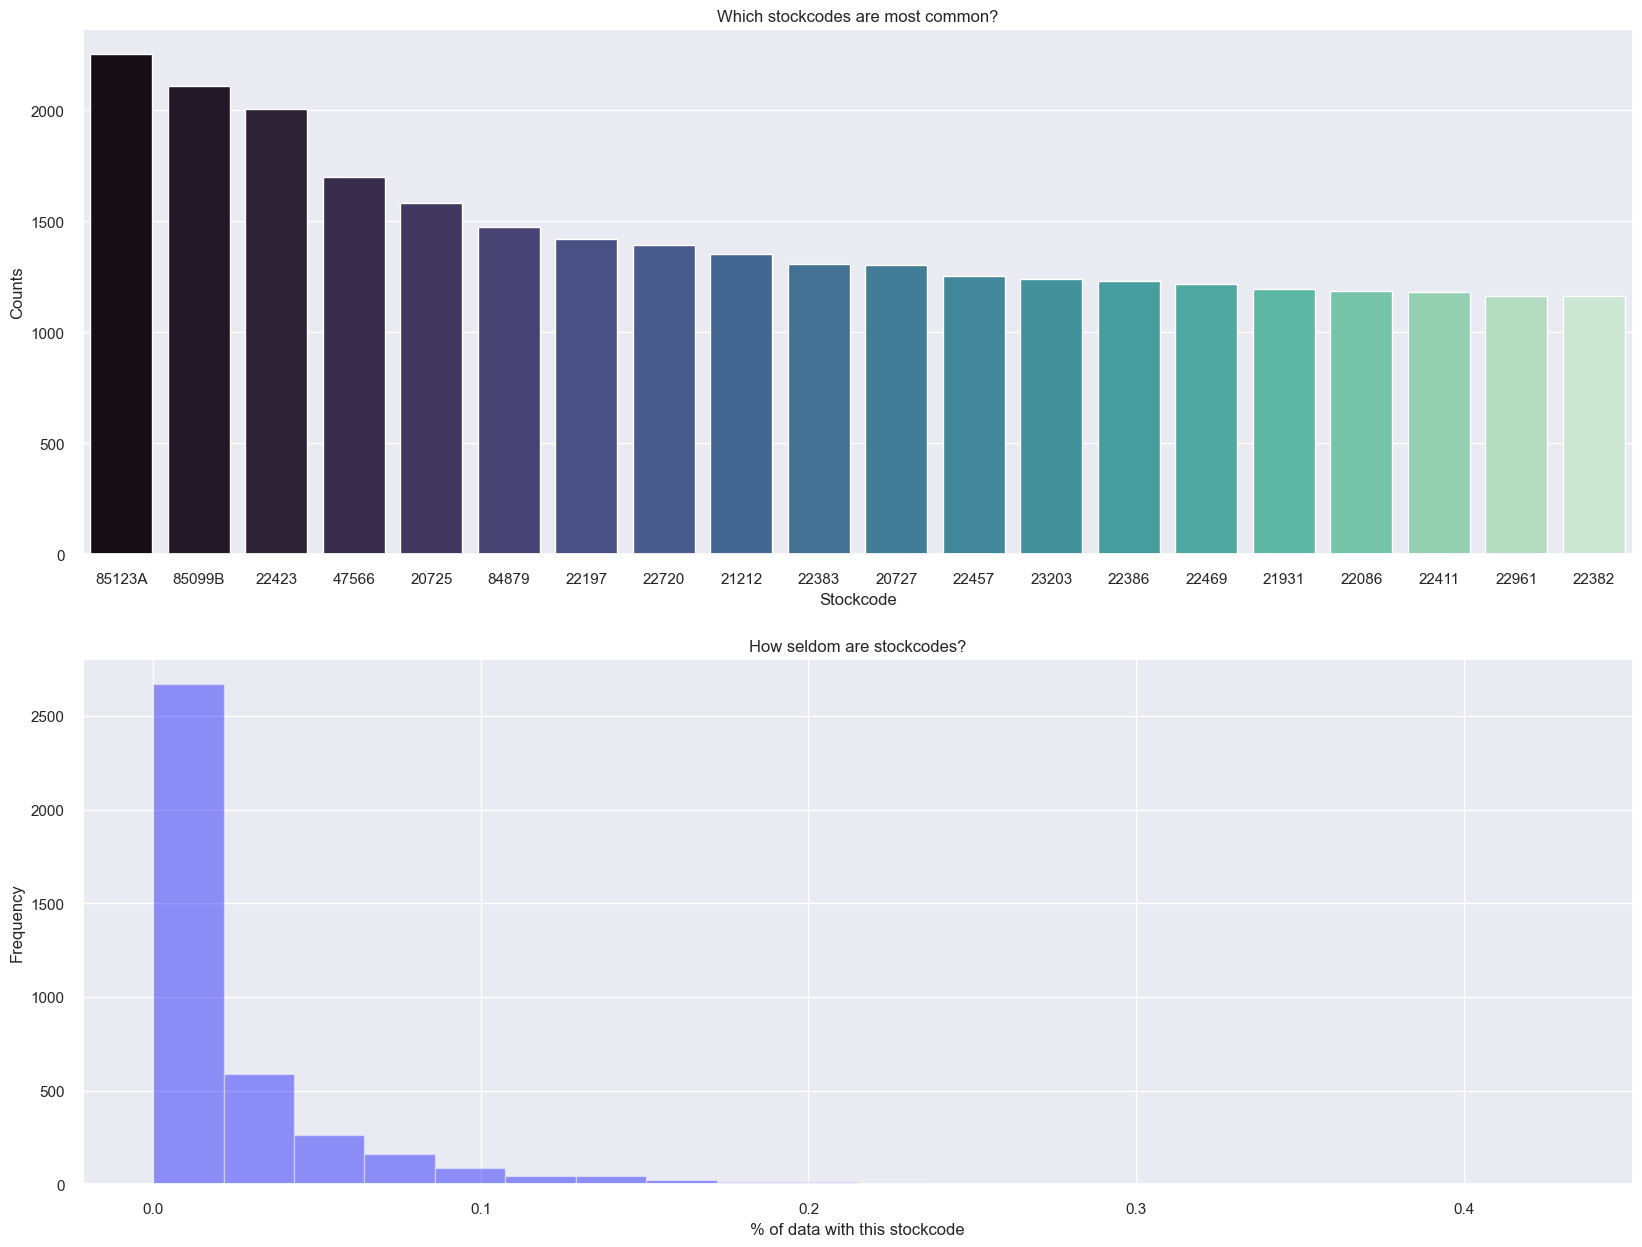

In [156]:
# Which Stockcodes are most common?
stockcode_counts = df_products.StockCode.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2, 1, figsize=(20, 15))

# First subplot - Bar plot
sns.barplot(x=stockcode_counts.iloc[0:20].index,
            y=stockcode_counts.iloc[0:20].values,
            ax=ax[0], palette="mako")
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Which stockcodes are most common?")

# Second subplot - Histogram
sns.distplot(np.round(stockcode_counts / df_products.shape[0] * 100, 2),
             kde=False,
             bins=20,
             ax=ax[1], color="Blue")
ax[1].set_title("How seldom are stockcodes?")
ax[1].set_xlabel("% of data with this stockcode")
ax[1].set_ylabel("Frequency")

plt.show()

In [157]:
# Most stockcodes are very seldom. This indicates that the retailer sells many different products and that there is no strong 
# secialization of a specific stockcode. Nevertheless this must not mean that the retailer is not 
# specialized given a specific product type. The stockcode could be a very detailed indicator that does not yield information 
# of the type, for example water bottles may have very different variants in color, name and shapes but they are all water bottles. 

In [158]:
# How many unique descriptions do we have?
df_products.Description.nunique()

4026

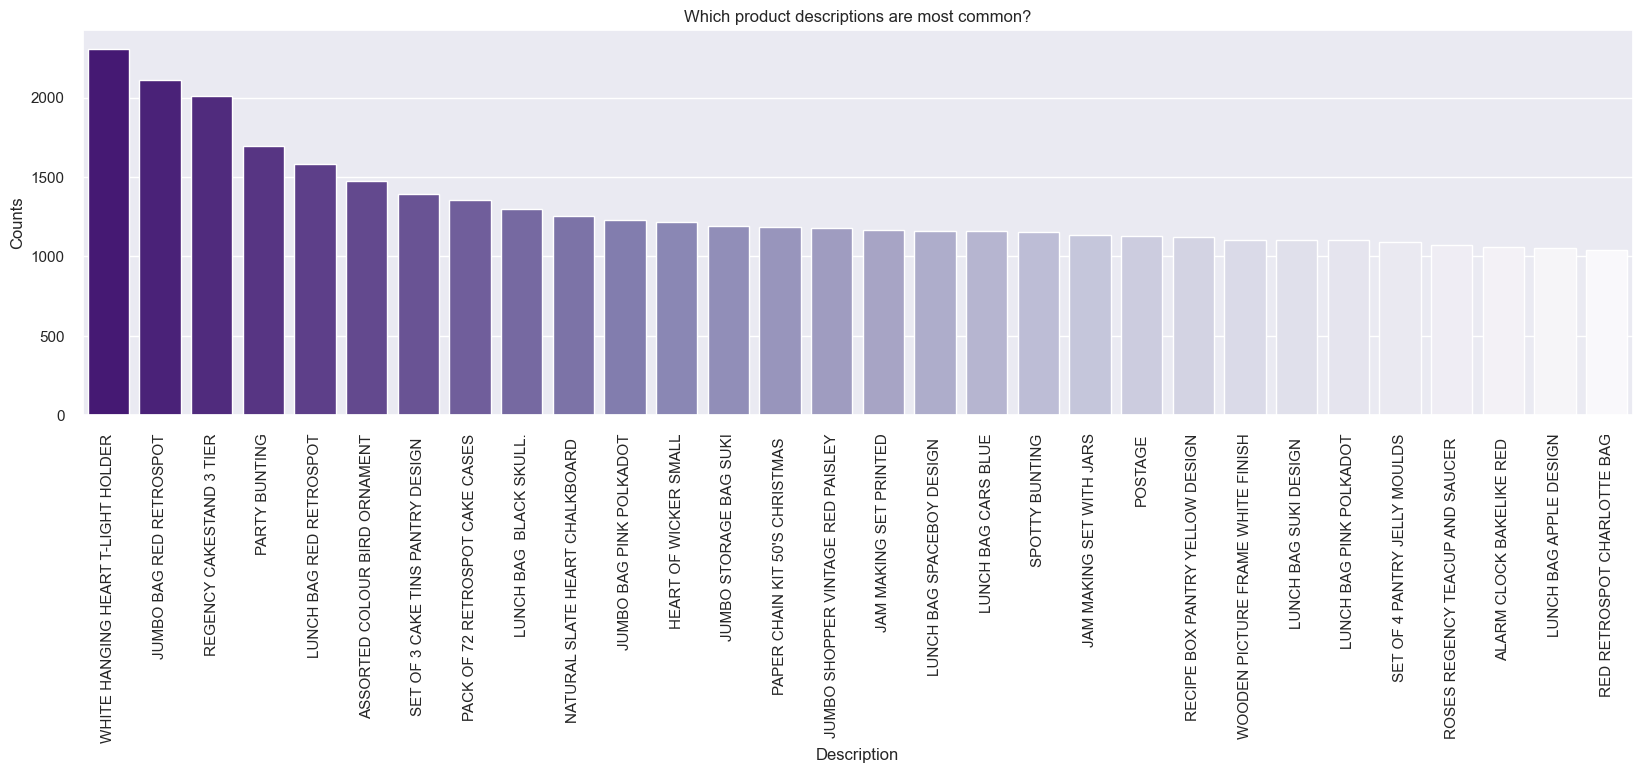

In [159]:
# And which are most common?
description_counts = df_products.Description.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20, 5))
sns.barplot(x=description_counts.index, y=description_counts.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Which product descriptions are most common?")
plt.xticks(rotation=90)
plt.show()

In [160]:
# Find outliers

Text(0.5, 0, 'Log-Unit-Price')

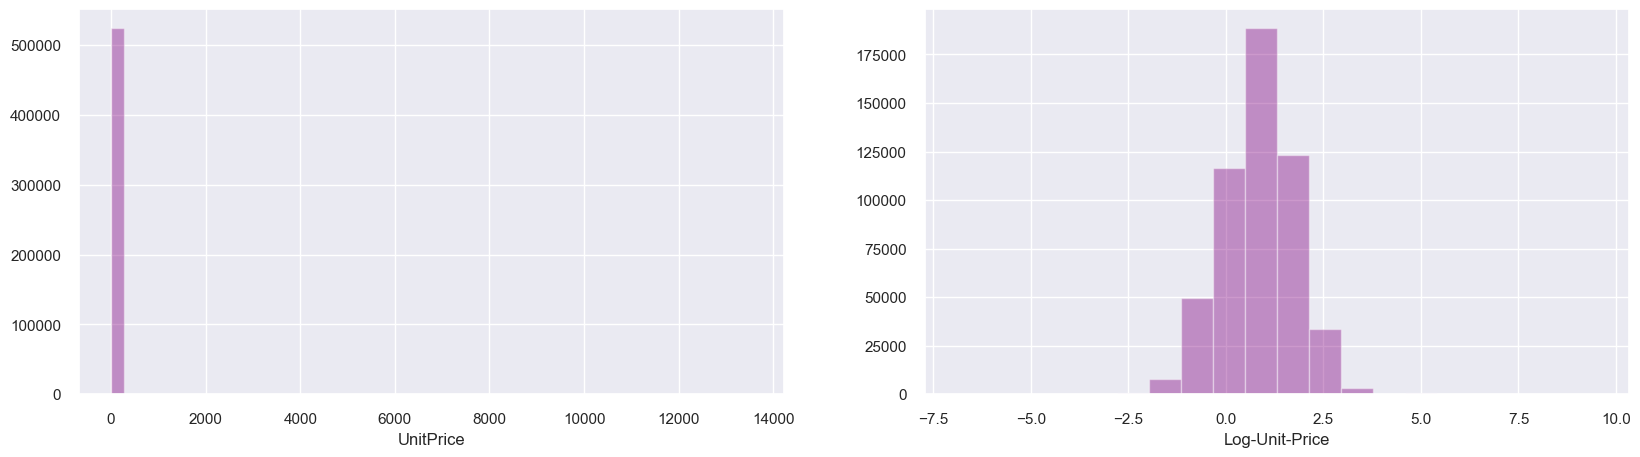

In [161]:
# UnitPrice
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df_products.UnitPrice, ax=ax[0], kde=False, color="Purple")
sns.distplot(np.log(df_products.UnitPrice), ax=ax[1], bins=20, color="Purple", kde=False)
ax[1].set_xlabel("Log-Unit-Price")

In [162]:
np.exp(-2)

0.1353352832366127

In [163]:
np.exp(3)

20.085536923187668

In [164]:
df_products = df_products.loc[(df_products.UnitPrice > 0.1) & (df_products.UnitPrice < 20)].copy()

Text(0.5, 0, 'Natural-Log Quantity')

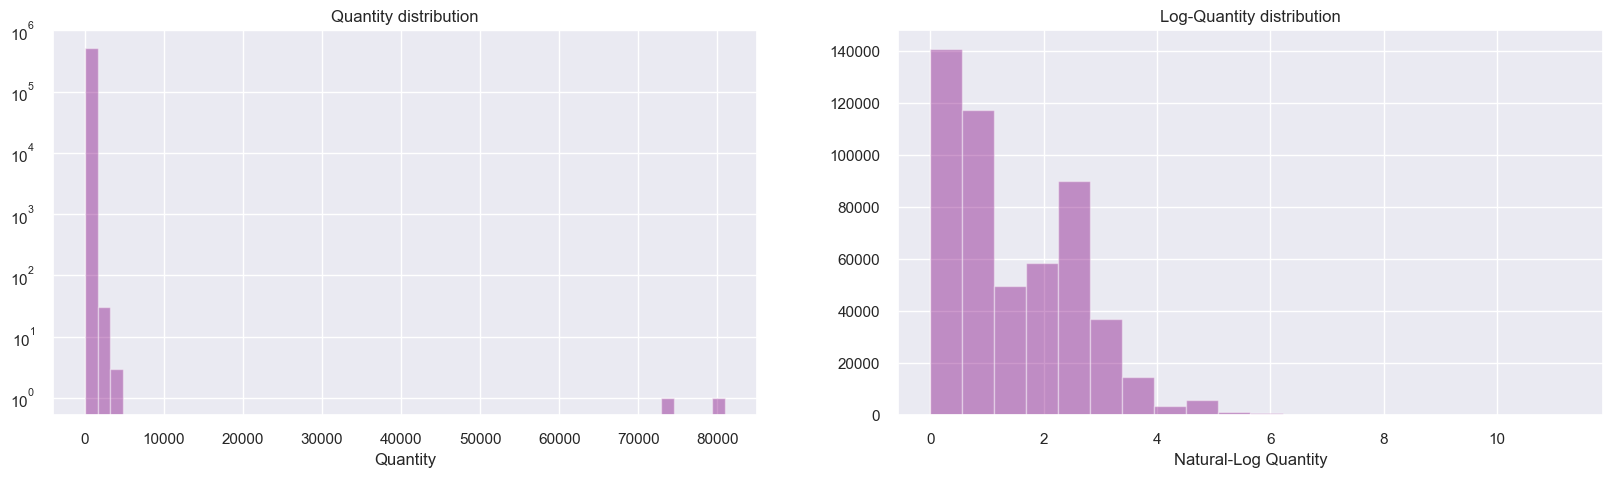

In [165]:
# Quantity
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df_products.Quantity, ax=ax[0], kde=False, color="Purple");
sns.distplot(np.log(df_products.Quantity), ax=ax[1], bins=20, kde=False, color="Purple");
ax[0].set_title("Quantity distribution")
ax[0].set_yscale("log")
ax[1].set_title("Log-Quantity distribution")
ax[1].set_xlabel("Natural-Log Quantity")

In [166]:
np.exp(4)

54.598150033144236

In [167]:
df_products = df_products.loc[df_products.Quantity < 55].copy()

In [168]:
# Add some columns to dataframe
df_products["Revenue"] = df_products.Quantity * df_products.UnitPrice
df_products["Year"] = df_products.InvoiceDate.dt.year
df_products["Quarter"] = df_products.InvoiceDate.dt.quarter
df_products["Month"] = df_products.InvoiceDate.dt.month
df_products["Week"] = df_products["InvoiceDate"].dt.isocalendar().week
df_products["Weekday"] = df_products.InvoiceDate.dt.weekday
df_products["Day"] = df_products.InvoiceDate.dt.day
df_products["Dayofyear"] = df_products.InvoiceDate.dt.dayofyear
df_products["Date"] = pd.to_datetime(df_products[['Year', 'Month', 'Day']])

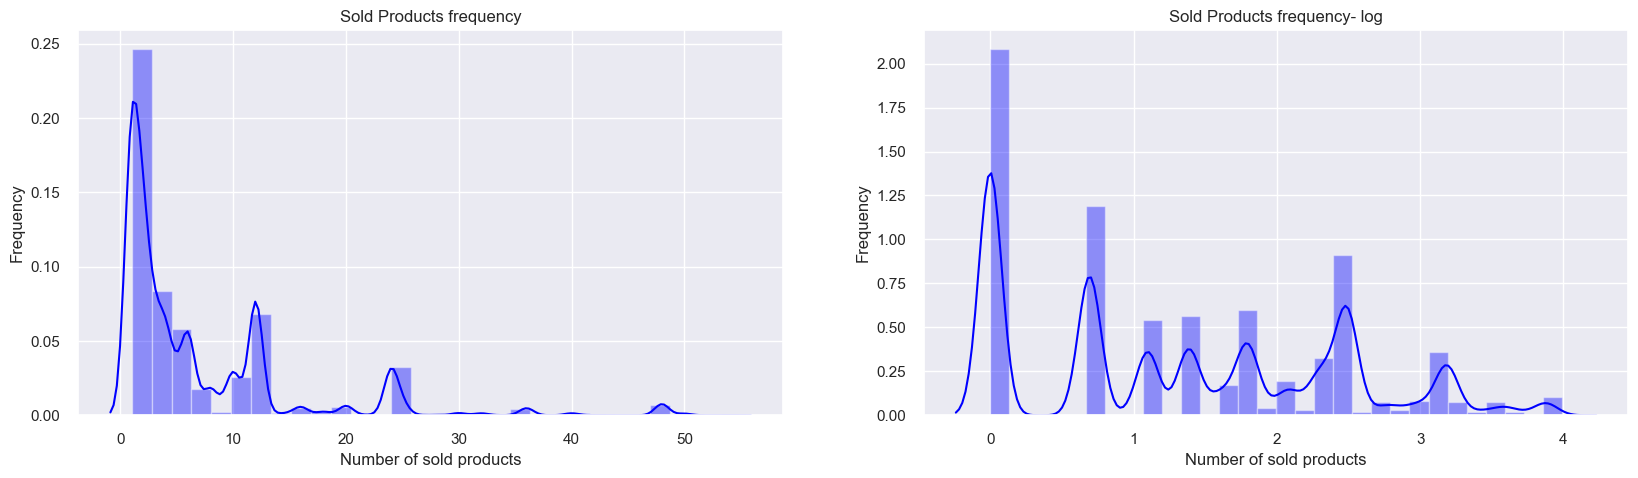

In [169]:
# Daily Sale
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df_products.Quantity.values, kde=True, ax=ax[0], color="Blue", bins=30);
sns.distplot(np.log(df_products.Quantity.values), kde=True, ax=ax[1], color="Blue", bins=30);
ax[0].set_xlabel("Number of sold products");
ax[0].set_ylabel("Frequency");
ax[0].set_title("Sold Products frequency");
ax[1].set_xlabel("Number of sold products");
ax[1].set_ylabel("Frequency");
ax[1].set_title("Sold Products frequency- log");

In [170]:
# The distributions are right skewed. Lower values are more common. 
# we can say that specific products are often bought as single quantites or in a small bunch.

#### Monthly sale

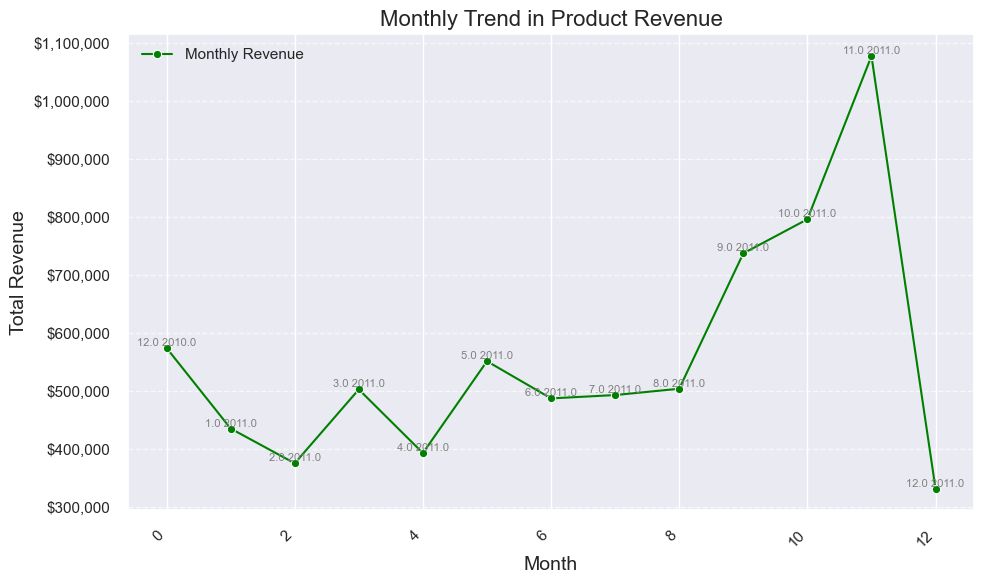

In [171]:
# Group by Year and Month and sum the Revenue
monthly_revenue = df_products.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

# Set the seaborn style
sns.set(style="darkgrid")

# Plotting with seaborn
plt.figure(figsize=(10, 6))

# Line plot with markers
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue['Revenue'], marker='o', color='green', label='Monthly Revenue')

# Adding labels and title
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.title('Monthly Trend in Product Revenue', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding legend
plt.legend(loc='upper left')

# Adding annotations
for index, row in monthly_revenue.iterrows():
    plt.text(index, row['Revenue'], f"{row['Month']} {row['Year']}", ha='center', va='bottom', fontsize=8, color='grey')


plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Show the plot
plt.tight_layout()
plt.show()


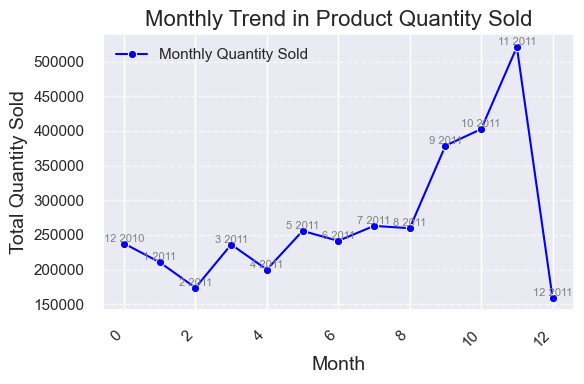

In [172]:
# Group by Year and Month and sum the Quantity
monthly_quantity = df_products.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Set the seaborn style
sns.set(style="darkgrid")

# Plotting with seaborn
plt.figure(figsize=(6, 4))

# Line plot with markers
sns.lineplot(x=monthly_quantity.index, y=monthly_quantity['Quantity'], marker='o', color='blue', label='Monthly Quantity Sold')

# Adding labels and title
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.title('Monthly Trend in Product Quantity Sold', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding legend
plt.legend(loc='upper left')

# Adding annotations
for index, row in monthly_quantity.iterrows():
    plt.text(index, row['Quantity'], f"{row['Month']} {row['Year']}", ha='center', va='bottom', fontsize=8, color='grey')

# Show the plot
plt.tight_layout()
plt.show()


In [173]:
# It seems that the sale is more in september, october and november and interestingly it decreases in the December,
# what is the reason, it seems a little bit strange but the reason might be:
# Back-to-School Season: In many regions, September is associated with the back-to-school season. 
# This period often involves increased spending on school supplies, clothing, and other related items. (Although the retailer sells
# gifts more then and school products, but there are still school related products in the shop)
# Black Friday and Cyber Monday: In some regions, the end of November is marked by significant shopping events such as Black Friday 
# and Cyber Monday. These events often result in a surge in retail sales as consumers take advantage of discounts and promotions.
# Weather Conditions: Weather can also impact retail sales. For instance, people may be more inclined to purchase summer clothing 
# and outdoor items during warmer months or in the cold weather people tend to be more in home and spend more time in internet and 
# buy more things online.
# the sale on december might be a wrong data !

In [174]:
# Unfortunately we don't have the retail infromation about another year to find out if it has a pattern or it is just an accident.

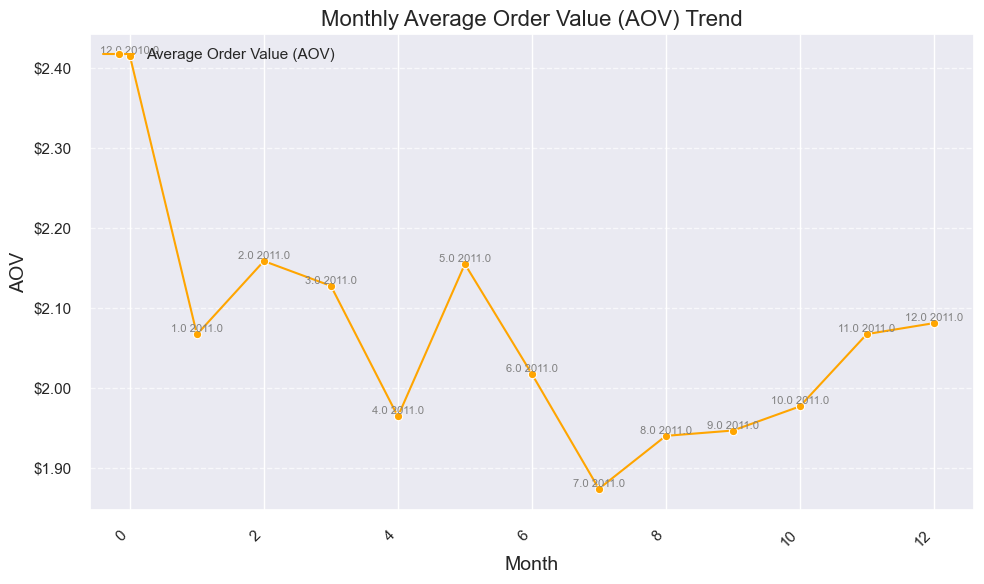

In [175]:
# AOV (Average Order Value)
monthly_data = df_products.groupby(['Year', 'Month'], as_index=False).agg({'Revenue': 'sum', 'Quantity': 'sum'})

# Calculate Average Order Value (AOV)
monthly_data['AOV'] = monthly_data['Revenue'] / monthly_data['Quantity']

# Set the seaborn style
sns.set(style="darkgrid")

# Plotting with seaborn
plt.figure(figsize=(10, 6))

# Line plot with markers for AOV
sns.lineplot(x=monthly_data.index, y=monthly_data['AOV'], marker='o', color='orange', label='Average Order Value (AOV)')

# Adding labels and title
plt.xlabel('Month', fontsize=14)
plt.ylabel('AOV', fontsize=14)
plt.title('Monthly Average Order Value (AOV) Trend', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding legend
plt.legend(loc='upper left')

# Adding annotations
for index, row in monthly_data.iterrows():
    plt.text(index, row['AOV'], f"{row['Month']} {row['Year']}", ha='center', va='bottom', fontsize=8, color='grey')

# Formatting y-axis ticks to display in regular format
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))

# Show the plot
plt.tight_layout()
plt.show()


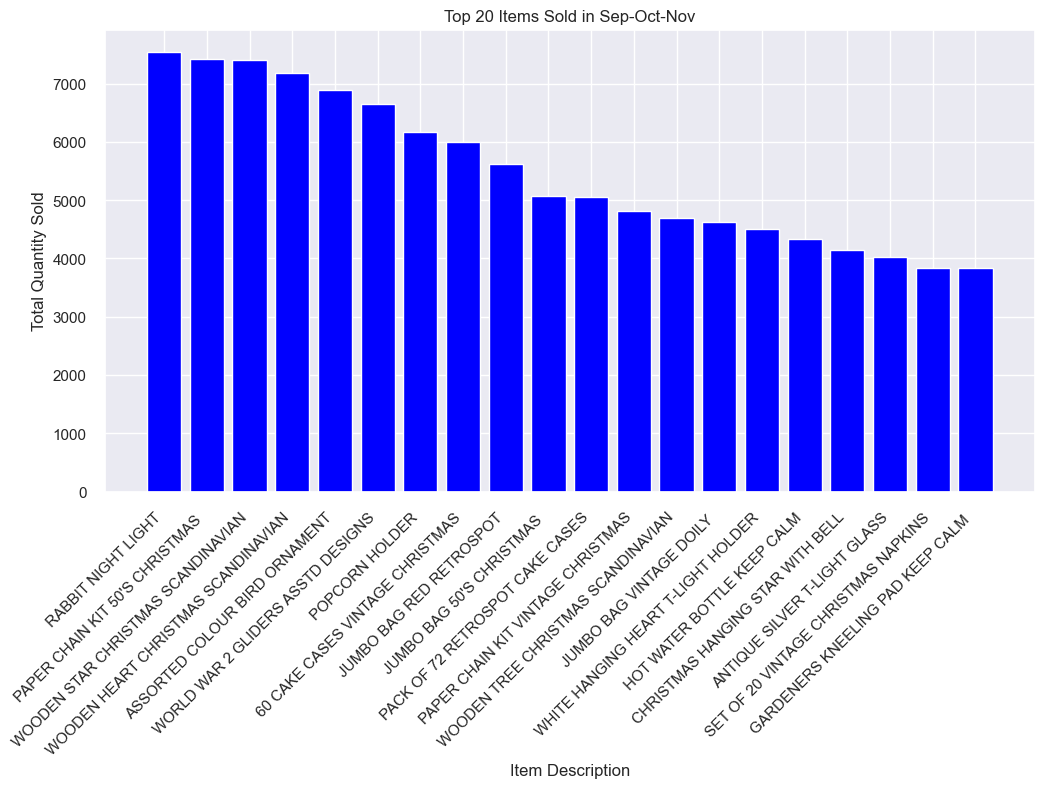

In [176]:
# let's See which Items is more sold in 3 peak months:
# Filter data for the desired months (September, October, November)
target_months = [9, 10, 11]
df_target_months = df_products[df_products['Month'].isin(target_months)]

# Group by 'StockCode' and sum the 'Quantity' for each item
item_sales = df_target_months.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

# Sort by total quantity sold in descending order
item_sales = item_sales.sort_values(by='Quantity', ascending=False)

# Plot the top N items
top_n = 20  # Adjust N as needed

plt.figure(figsize=(12, 6))
plt.bar(item_sales['Description'][:top_n], item_sales['Quantity'][:top_n], color='blue')
plt.xlabel('Item Description')
plt.ylabel('Total Quantity Sold')
plt.title(f'Top {top_n} Items Sold in Sep-Oct-Nov')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [177]:
# Most of them seems to be Chrismasy Items !

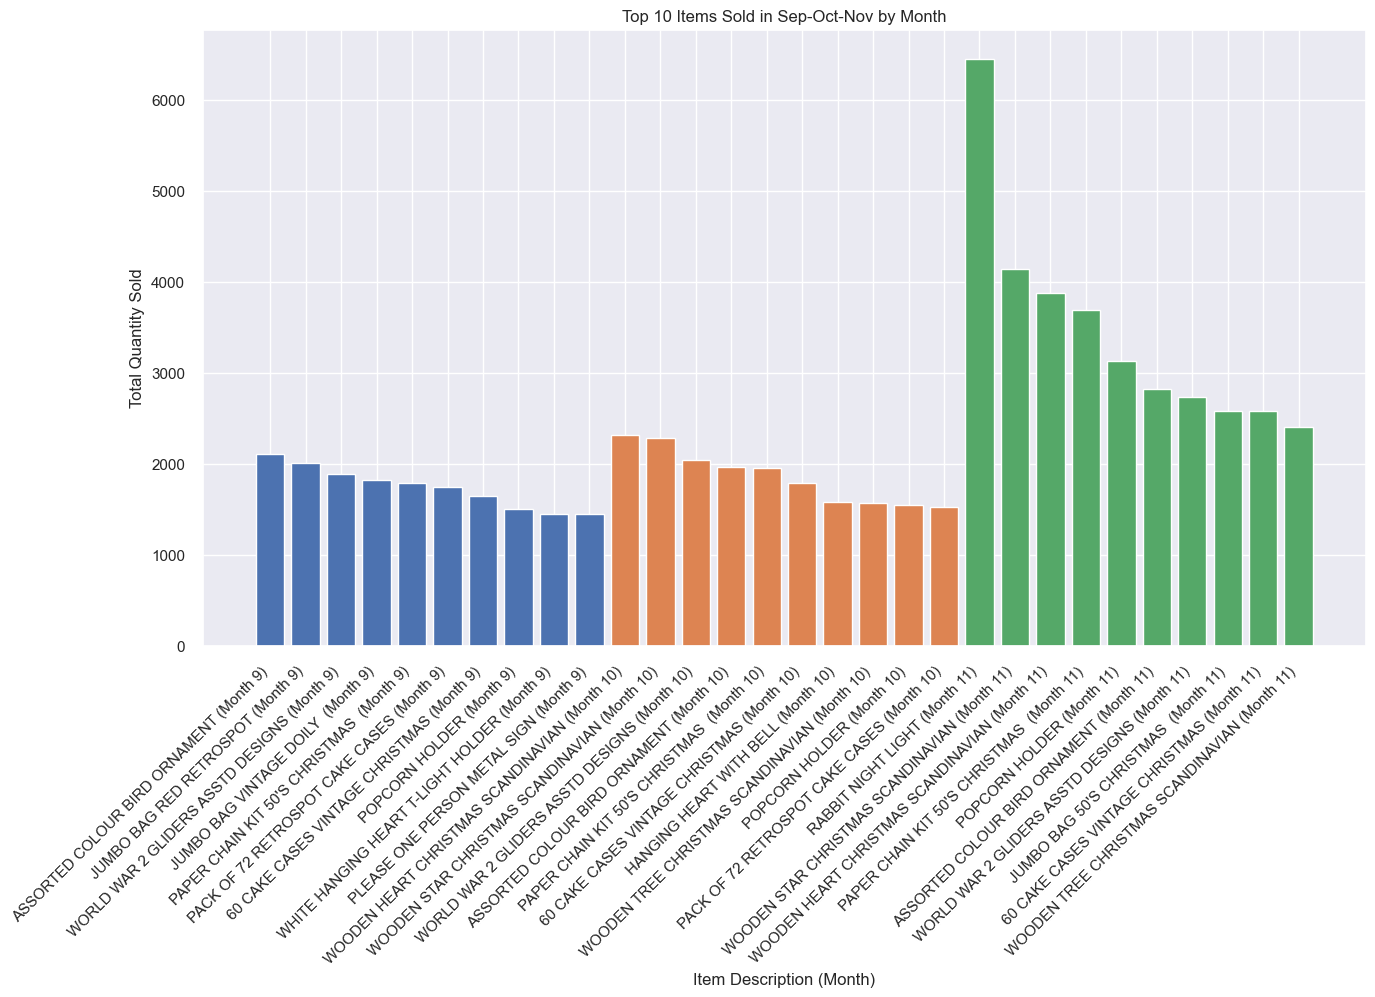

In [178]:
df_target_months = df_products[df_products['Month'].isin(target_months)]

# Group by 'Month', 'StockCode', and 'Description' and sum the 'Quantity' for each item
item_sales_by_month = df_target_months.groupby(['Month', 'StockCode', 'Description'])['Quantity'].sum().reset_index()

# Sort by total quantity sold in descending order for each month
item_sales_by_month = item_sales_by_month.sort_values(by=['Month', 'Quantity'], ascending=[True, False])

# Plot the top N items for each month
top_n = 10  # Adjust N as needed

plt.figure(figsize=(15, 8))

for month in target_months:
    plt.bar(item_sales_by_month[item_sales_by_month['Month'] == month]['Description'][:top_n] +
            f" (Month {month})", 
            item_sales_by_month[item_sales_by_month['Month'] == month]['Quantity'][:top_n])

plt.xlabel('Item Description (Month)')
plt.ylabel('Total Quantity Sold')
plt.title(f'Top {top_n} Items Sold in Sep-Oct-Nov by Month')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


### Peak Buying Times

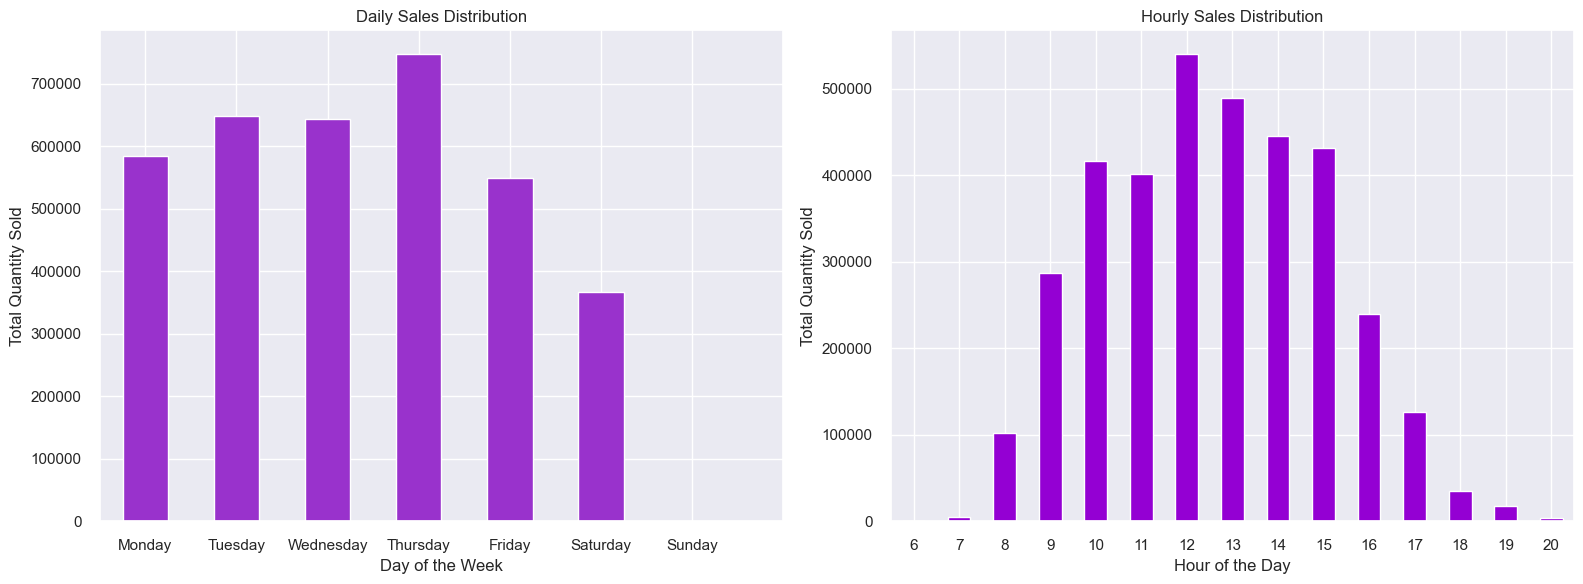

In [179]:
df_products['HourOfDay'] = df_products['InvoiceDate'].dt.hour

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot daily sales
daily_sales = df_products.groupby('Weekday')['Quantity'].sum()
daily_sales.plot(kind='bar', rot=0, ax=axes[0], color='darkorchid')

# Customize x-axis labels to start from Monday
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axes[0].set_xticks(list(range(len(day_labels))) + [len(day_labels)])  # Add an extra tick for Sunday
axes[0].set_xticklabels(day_labels + [''])  # Add an empty label for the extra tick
axes[0].set_title('Daily Sales Distribution')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Total Quantity Sold')

# Plot hourly sales
df_products.groupby('HourOfDay')['Quantity'].sum().plot(kind='bar', rot=0, ax=axes[1], color='darkviolet')
axes[1].set_title('Hourly Sales Distribution')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Total Quantity Sold')

# Adjust layout
plt.tight_layout()
plt.show()



In [180]:
# We see that people are more inclined to shop on Thursdays and also in the middle of the day.
# And Sundays and the early hours of the day and nights are not the favorite times for this seller's online shopping!

### Popular Products

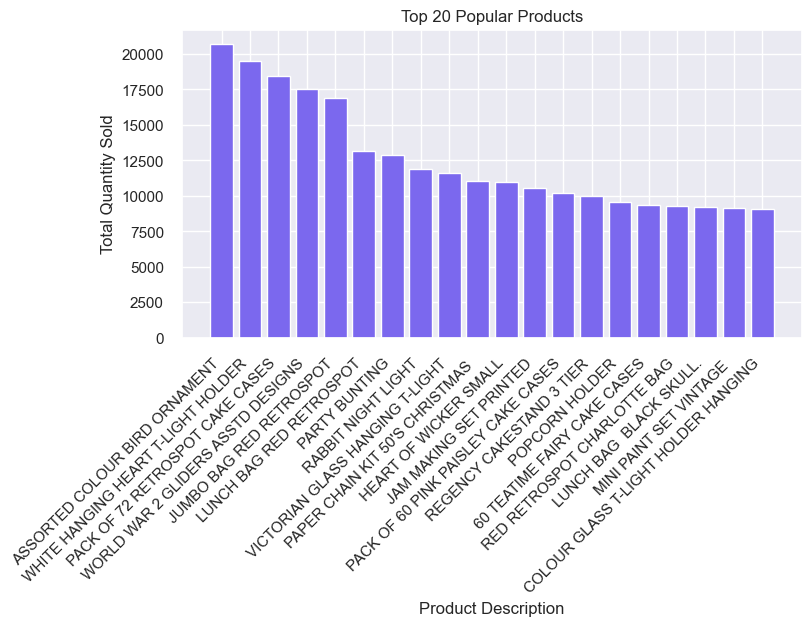

In [181]:
# Group by 'StockCode' and sum the 'Quantity' for each product
popular_products = df_products.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)

# Plot the top N popular products
top_n = 20
plt.figure(figsize=(8, 4))
plt.bar(popular_products.head(top_n)['Description'], popular_products.head(top_n)['Quantity'], color='mediumslateblue')
plt.title(f'Top {top_n} Popular Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [182]:
# The "Assorted colour bird ornament" and "white hanging heart T-light holder" are beste sellers.

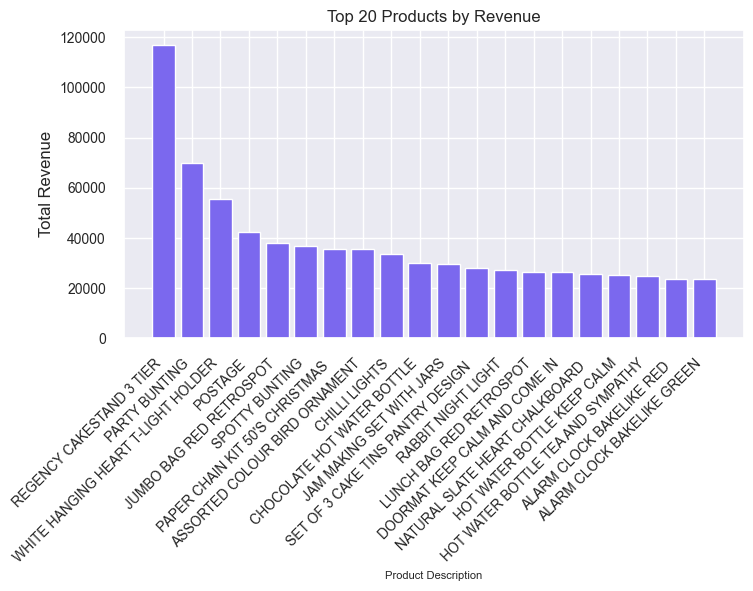

In [183]:
# Group by 'StockCode' and sum the 'Revenue' for each product
revenue_by_product = df_products.groupby(['StockCode', 'Description'])['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)

# Plot the top N products based on revenue
top_n = 20
plt.figure(figsize=(8, 4))
plt.bar(revenue_by_product.head(top_n)['Description'], revenue_by_product.head(top_n)['Revenue'], color='mediumslateblue')
plt.title(f'Top {top_n} Products by Revenue')
plt.xlabel('Product Description', fontsize=8)
plt.ylabel('Total Revenue', fontsize=12)
plt.tick_params(axis='x', labelsize=10)  # Adjust font size for x-axis labels
plt.tick_params(axis='y', labelsize=10)  # Adjust font size for y-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [184]:
# As we see, 'EGENCY CAKESTAND 3 TIER' and 'PARTY BUNTING' brings more value in the company.

### Unpopular Products

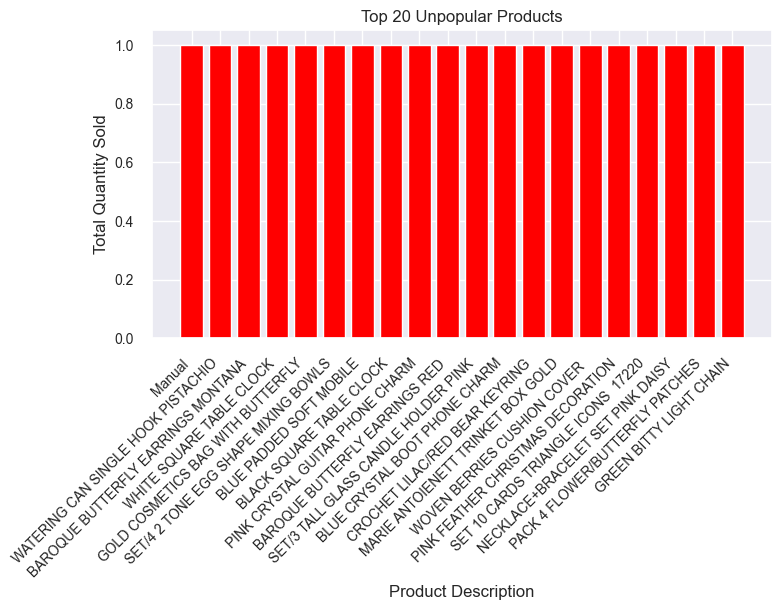

In [185]:
# Group by 'StockCode' and sum the 'Quantity' for each product
unpopular_products = df_products.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=True)

# Plot the top N unpopular products
top_n = 20
plt.figure(figsize=(8, 4))
plt.bar(unpopular_products.head(top_n)['Description'], unpopular_products.head(top_n)['Quantity'], color='red')
plt.title(f'Top {top_n} Unpopular Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.tick_params(axis='x', labelsize=10)  # Adjust font size for x-axis labels
plt.tick_params(axis='y', labelsize=10)  # Adjust font size for y-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [186]:
# While true that the one with only 1 sell are unpopular but the true unpopular ones are the ones that haven't been sold
# at all --> Srvivorship bias

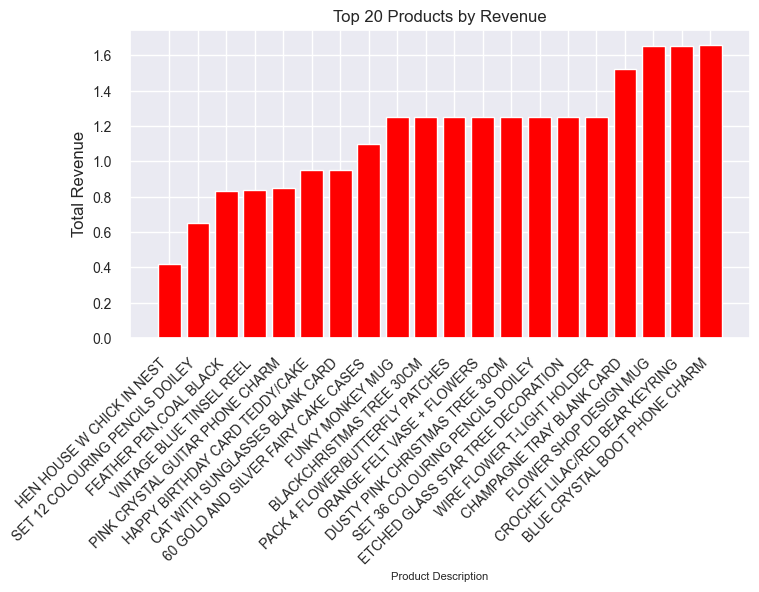

In [187]:
# Group by 'StockCode' and sum the 'Revenue' for each product
revenue_by_product = df_products.groupby(['StockCode', 'Description'])['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=True)

# Plot the top N products based on revenue
top_n = 20
plt.figure(figsize=(8, 4))
plt.bar(revenue_by_product.head(top_n)['Description'], revenue_by_product.head(top_n)['Revenue'], color='red')
plt.title(f'Top {top_n} Products by Revenue')
plt.xlabel('Product Description', fontsize=8)
plt.ylabel('Total Revenue', fontsize=12)
plt.tick_params(axis='x', labelsize=10)  # Adjust font size for x-axis labels
plt.tick_params(axis='y', labelsize=10)  # Adjust font size for y-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

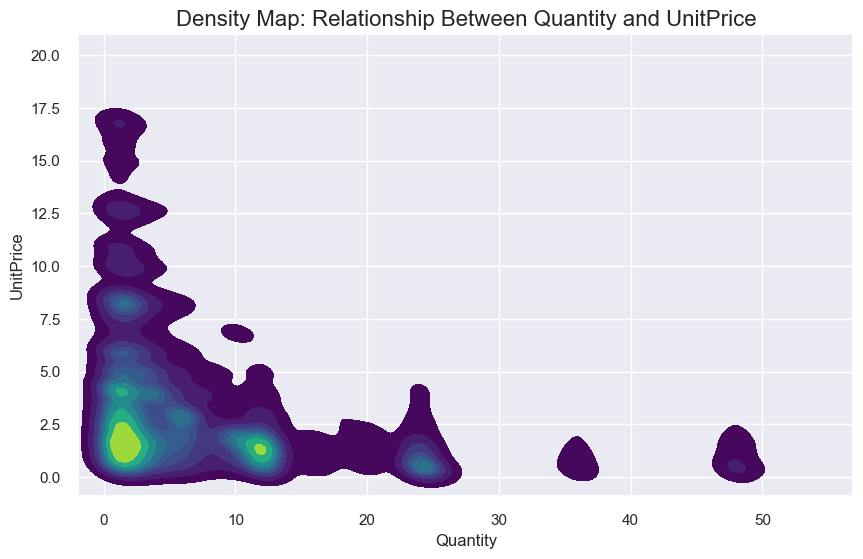

In [188]:
# Density map for the relationship between 'Quantity' and 'UnitPrice'
plt.figure(figsize=(10, 6))
density_map = sns.kdeplot(x='Quantity', y='UnitPrice', data=df_products, cmap='viridis', fill=True)

# Enhance plot aesthetics
density_map.set_title('Density Map: Relationship Between Quantity and UnitPrice', fontsize=16)
density_map.set_xlabel('Quantity', fontsize=12)
density_map.set_ylabel('UnitPrice', fontsize=12)

# Show the plot
plt.show()

In [189]:
# Conclusion:
# Distribution:
# Most data points are clustered in the lower left corner of the plot.
# This suggests that many transactions involve low quantities and low unit prices.
# There are isolated spots of higher density at specific combinations of quantity and price.
# These areas may represent common purchase patterns or specific product categories.


# Color Intensity:
# The color intensity on the map indicates the density of data points.
# Darker colors represent higher density, while lighter colors indicate lower density.

# Insights:
# The dense cluster in the lower left suggests that smaller quantities of items are commonly purchased at lower prices.
# The isolated high-density spots may correspond to specific products or promotions.

# Outliers --> there is not any significant outlier

In [190]:
# Correlation
correlation_coefficient = df_products['Quantity'].corr(df_products['UnitPrice'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: -0.2959176848174523


In [191]:
# A negative correlation indicates that as one unitprice increases, the quantity tends to decrease.

### Clustering Analysis

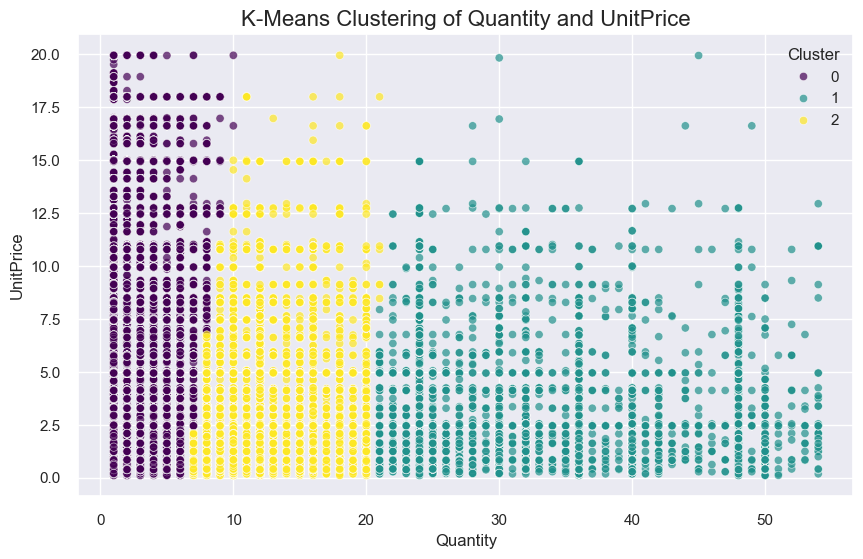

In [192]:
from sklearn.cluster import KMeans
# Assuming 'Quantity' and 'UnitPrice' are features for clustering
features = df_products[['Quantity', 'UnitPrice']]

# Fit K-means model
kmeans = KMeans(n_clusters=3, random_state=42)
df_products['Cluster'] = kmeans.fit_predict(features)

# Visualize the clustered data
plt.figure(figsize=(10, 6))
cluster_plot = sns.scatterplot(x='Quantity', y='UnitPrice', data=df_products, hue='Cluster', palette='viridis', alpha=0.7)

# Set plot aesthetics
cluster_plot.set_title('K-Means Clustering of Quantity and UnitPrice', fontsize=16)
cluster_plot.set_xlabel('Quantity', fontsize=12)
cluster_plot.set_ylabel('UnitPrice', fontsize=12)
cluster_plot.legend(title='Cluster', title_fontsize='12')

# Show the plot
plt.show()


In [193]:
# Density Plot Description:
# The scatter plot shows data points representing e-commerce transactions.
# Each point corresponds to a combination of quantity (number of items purchased) and unit price (price per item).

# Clusters:
# The plot has three distinct clusters, each represented by a different color (purple, yellow, and green).
# These clusters are formed by grouping data points based on their proximity in the quantity-price space.

# Interpretation:
# Cluster 0 (Purple):
    # Contains items with lower quantities but higher unit prices.
        # These could be premium or specialized products.
    # Cluster 1 (Yellow):
        # Includes items with moderate quantities and unit prices.
        # Represents a middle-ground segment.
    # Cluster 2 (Green):
        # Comprises items with higher quantities but lower unit prices.
        # Likely includes common or discounted products.

# Business Insights:
    # Understanding these clusters can guide business decisions:
        # Pricing Strategies: Tailor pricing strategies based on the cluster characteristics.
        # Segmentation: Identify customer segments (e.g., high spenders, bargain hunters).
        # Inventory Management: Optimize stock levels for different product types.

### Customer Analysis

In [194]:
#Finding unique values
print('A total of '+ str(df_customers.InvoiceNo.nunique()) +' unique invoices were generated.')

A total of 18532 unique invoices were generated.


In [195]:
print('We have '+ str(df_customers.StockCode.nunique()) +' unique products sold online.')

We have 3665 unique products sold online.


In [196]:
print('We have customers spread across '+ str(df_customers.Country.nunique()) +' countries. ')

We have customers spread across 37 countries. 


In [197]:
# The time analysis suggests most of the sutomers sjould mainly come from the same time zone and now we see that we have customers
# from 37 countries, what does it mean?
# Maybe the time of the day is a local time for each customer!! Then it would make sense

In [198]:
print('There are ' + str(df_customers.CustomerID.nunique()) + ' unique customers.')

There are 4338 unique customers.


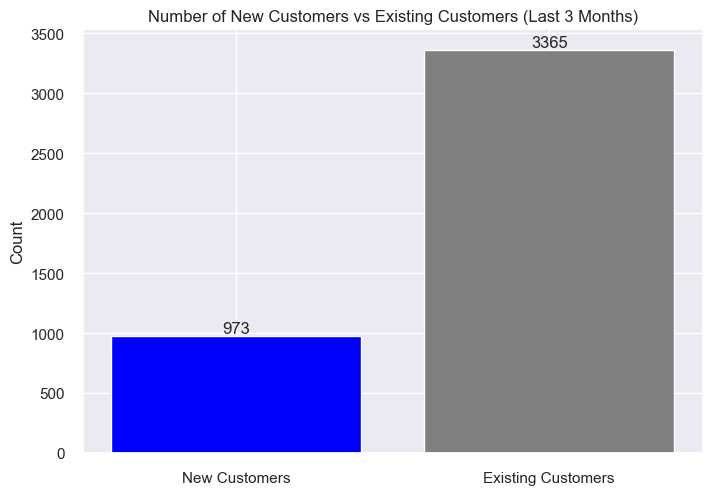

In [199]:
from datetime import datetime, timedelta

# Sort the DataFrame by 'InvoiceDate' to identify the first purchase for each customer
df_customers_new = df_customers.copy()
# Sort the DataFrame by 'InvoiceDate' to identify the first purchase for each customer
df_customers_new.sort_values(by=['CustomerID', 'InvoiceDate'], inplace=True)

# Identify the first purchase date for each customer
first_purchase = df_customers_new.groupby('CustomerID')['InvoiceDate'].first().reset_index()

# Calculate the date three months ago from the maximum date in the dataset
three_months_ago = df_customers_new['InvoiceDate'].max() - pd.DateOffset(months=3)

# Filter customers with their first purchase in the last 3 months
new_customers_last_3_months = first_purchase[first_purchase['InvoiceDate'] >= three_months_ago]

num_new_customers = new_customers_last_3_months['CustomerID'].nunique()
num_existing_customers = first_purchase[first_purchase['InvoiceDate'] < three_months_ago]['CustomerID'].nunique()


# Plot the counts with annotations
fig, ax = plt.subplots()
bars = ax.bar(['New Customers', 'Existing Customers'], [num_new_customers, num_existing_customers], color=['blue', 'gray'])
ax.set_ylabel('Count')

# Annotate count values on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Number of New Customers vs Existing Customers (Last 3 Months)')
plt.show()



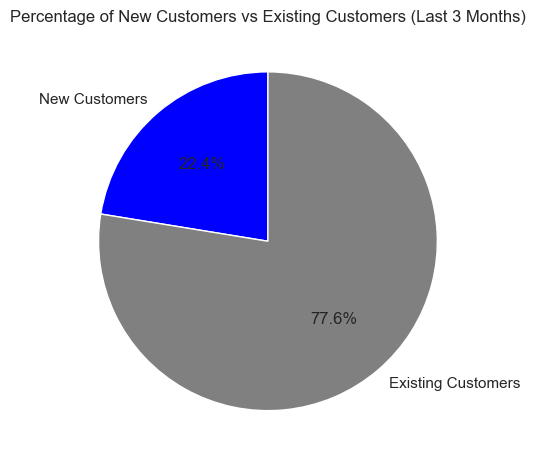

In [200]:
num_total_customers = first_purchase['CustomerID'].nunique()

# Calculate percentages
percent_new_customers = (num_new_customers / num_total_customers) * 100
percent_existing_customers = 100 - percent_new_customers

# Plot the percentages in a pie chart
labels = ['New Customers', 'Existing Customers']
sizes = [percent_new_customers, percent_existing_customers]
colors = ['blue', 'gray']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of New Customers vs Existing Customers (Last 3 Months)')
plt.show()



In [201]:
# Customer retention rate 
# Extract the month and year from 'InvoiceDate'
df_customers['Month'] = df_customers['InvoiceDate'].dt.month
df_customers['Year'] = df_customers['InvoiceDate'].dt.year

# Identify the number of customers at the start of each month
customers_at_start = df_customers.groupby(['Year', 'Month'])['CustomerID'].nunique().reset_index()

# Identify the number of new customers acquired each month
new_customers_acquired = df_customers.groupby(['Year', 'Month'])['CustomerID'].nunique().diff().fillna(0).reset_index()
new_customers_acquired['CustomerID'] = new_customers_acquired['CustomerID'].astype(int)

# Merge dataframes to get the number of customers at the end of each month
customers_at_end = pd.merge(customers_at_start, new_customers_acquired, on=['Year', 'Month'], how='left')
customers_at_end['CustomerID_y'] = customers_at_end['CustomerID_y'].cumsum()
customers_at_end['Customers_at_End'] = customers_at_end['CustomerID_x'] + customers_at_end['CustomerID_y']

# Calculate the retention rate
customers_at_end['Retention_Rate'] = (1 - (customers_at_end['CustomerID_y'] / customers_at_end['CustomerID_x'])) * 100

# Print the resulting dataframe
print(customers_at_end[['Year', 'Month', 'Customers_at_End', 'Retention_Rate']])


    Year  Month  Customers_at_End  Retention_Rate
0   2010     12               885      100.000000
1   2011      1               597      119.433198
2   2011      2               631      116.754617
3   2011      3              1063       90.862423
4   2011      4               827      103.387850
5   2011      5              1227       83.806818
6   2011      6              1097       89.303734
7   2011      7              1013       93.256059
8   2011      8               985       94.652406
9   2011      9              1647       69.905213
10  2011     10              1843       64.882698
11  2011     11              2443       53.185096
12  2011     12               345      143.902439


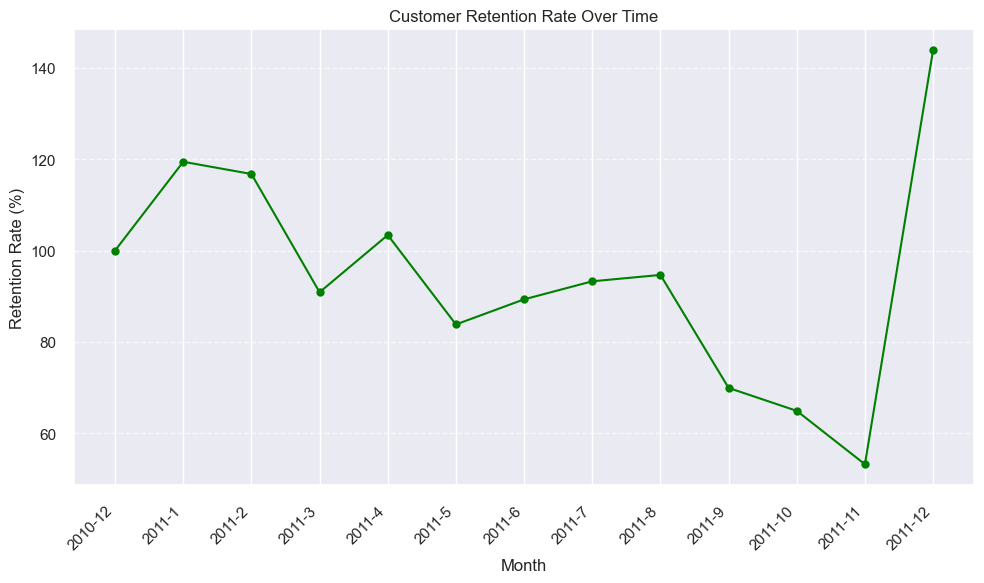

In [202]:
# Plot the retention rate over time
plt.figure(figsize=(10, 6))
plt.plot(customers_at_end['Year'].astype(str) + '-' + customers_at_end['Month'].astype(str), customers_at_end['Retention_Rate'], marker='o', color='green')
plt.title('Customer Retention Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [203]:
# Conclusion:
# Retention Rate Trends:
# The green line connects data points representing each month’s customer retention rate.
# key observations:
    # Initially, there is a decline in the retention rate from over 120% to just above 100% between “2010/12” and “2011/2.”
    # From “2011/2” to “2011/9,” there are fluctuations around the 100% mark.
    # A sharp decline occurs between “2011/9” and “2011/11,” reaching below an 80% retention rate.
    # There is a dramatic increase in customer retention at “2011/12,” where it spikes up beyond 130%.

# Interpretation:
    # Retention Rate: The retention rate indicates the percentage of customers who remain loyal to the company over time.
    # High Retention: A high retention rate suggests satisfied customers and efficient customer management.
    # Fluctuations: The fluctuations indicate variability in retaining customers during the observed period.
    # Spike: The significant increase in retention at the end of the period could be due to successful retention strategies or specific events.

# Business Insights:
    # Success Metrics: A high retention rate reflects customer satisfaction and loyalty.
    # Cost Efficiency: Retained customers cost less in marketing than acquiring new ones.
    # Actionable Steps: Investigate reasons behind fluctuations and learn from the spike to optimize retention strategies.


In [204]:
df_customers.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [205]:
# RFM Analysis
# Create a column Amount(Total cost)
df_customers['Amount'] = df_customers['Quantity'] * df_customers['UnitPrice']
pin_date = dt.datetime(2011, 12, 10)

rfm = df_customers.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (pin_date - InvoiceDate.max()).days,
                                     'InvoiceNo': lambda InvoiceNo: InvoiceNo.nunique(),
                                     'Amount': lambda Amount: Amount.sum()})

rfm.head()

,InvoiceDate,InvoiceNo,Amount
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40


In [206]:
rfm.columns = ['recency', 'frequency', 'monetary']
rfm = rfm[rfm["monetary"] > 0]
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40


In [207]:
# Calculate the score
# We need to assign a score from 1 to 5 to recency, frequency and monetary value individually for each customer.
# Below is the conversion of columns into rfm scores between 1 to 5.
# '5' being the highest and '1' being the least.
# The higher the monetary value, higher is the score ie,'5' .
# Smaller value of recency indicates recent purchases, so it takes the higher value of 5.
# Frequency is the same as monetary, higher the frequency, higher the score.

In [208]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])


rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['score']=rfm['recency_score'].astype(int)+rfm['frequency_score'].astype(int)+rfm['monetary_score'].astype(int)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,7
12347.0,2,7,4310.00,5,5,5,15
12348.0,75,4,1797.24,2,4,4,10
12349.0,18,1,1757.55,4,1,4,9
12350.0,310,1,334.40,1,1,2,4


In [209]:
# Best customers
rfm[rfm['score']== 15].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
CustomerID,,,,,,,
14646.0,1,73,280206.02,5,5,5,15
18102.0,0,60,259657.30,5,5,5,15
17450.0,8,46,194390.79,5,5,5,15
14911.0,1,201,143711.17,5,5,5,15
14156.0,9,55,117210.08,5,5,5,15


In [210]:
# The customers having a score of '15' are considered as the 'best customers' as they have have the highest recency, 
# frequency and monetary score.
# They are asset to the company.


In [211]:
# why CustomerID 18102.0 recency is negative? --> I changed the max Date to 10 instead 09
df_customers[df_customers['CustomerID'] == 18102.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Amount
16425,537657,82484,WOOD BLACK BOARD ANT WHITE FINISH,408,2010-12-07 16:42:00,4.78,18102.0,United Kingdom,12,2010,1950.24
16426,537657,22830,UTILTY CABINET WITH HOOKS,30,2010-12-07 16:42:00,19.84,18102.0,United Kingdom,12,2010,595.20
16427,537657,22189,CREAM HEART CARD HOLDER,972,2010-12-07 16:42:00,2.31,18102.0,United Kingdom,12,2010,2245.32
16428,537657,22188,BLACK HEART CARD HOLDER,972,2010-12-07 16:42:00,2.31,18102.0,United Kingdom,12,2010,2245.32
16429,537657,21623,VINTAGE UNION JACK MEMOBOARD,408,2010-12-07 16:42:00,6.38,18102.0,United Kingdom,12,2010,2603.04
...,...,...,...,...,...,...,...,...,...,...,...
540066,581457,23535,WALL ART BICYCLE SAFETY,126,2011-12-08 18:43:00,3.90,18102.0,United Kingdom,12,2011,491.40
540067,581457,23530,WALL ART ONLY ONE PERSON,126,2011-12-08 18:43:00,3.57,18102.0,United Kingdom,12,2011,449.82
540068,581457,23526,WALL ART DOG LICENCE,126,2011-12-08 18:43:00,3.90,18102.0,United Kingdom,12,2011,491.40
540069,581457,23401,RUSTIC MIRROR WITH LACE HEART,126,2011-12-08 18:43:00,4.15,18102.0,United Kingdom,12,2011,522.90


In [212]:
# Number of best customers
rfm[rfm['score']==15].count()

recency            347
frequency          347
monetary           347
recency_score      347
frequency_score    347
monetary_score     347
score              347
dtype: int64

In [213]:
# There are 347 Best customers in the company who are frequent buyers and also generate high revenue.

In [214]:
# Seggregate the levels
# I am going to seggregate the level of the customer based on the score.
# Active : High revenue generating and frequent buyers .
# Good: Customers whose purchases are fairly frequent and generate moderate revenue.
# Average : Customers who are less active and are not very frequent buyers and generate low revenue.
# Inactive: Customers generating very low revenue and are occasional buyers.

In [215]:
def rfm_level(score):
    if  ((score >1) and (score < 4)):
        return 'Inactive'
    elif ((score >3) and (score < 8)):
        return 'Average'
    elif ((score > 7) and (score <11)):
        return 'Good'
    else:
        return 'Active'

In [216]:
rfm['level'] = rfm['score'].apply(lambda score : rfm_level(score))
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,level
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,5,7,Average
12347.0,2,7,4310.00,5,5,5,15,Active
12348.0,75,4,1797.24,2,4,4,10,Good
12349.0,18,1,1757.55,4,1,4,9,Good
12350.0,310,1,334.40,1,1,2,4,Average


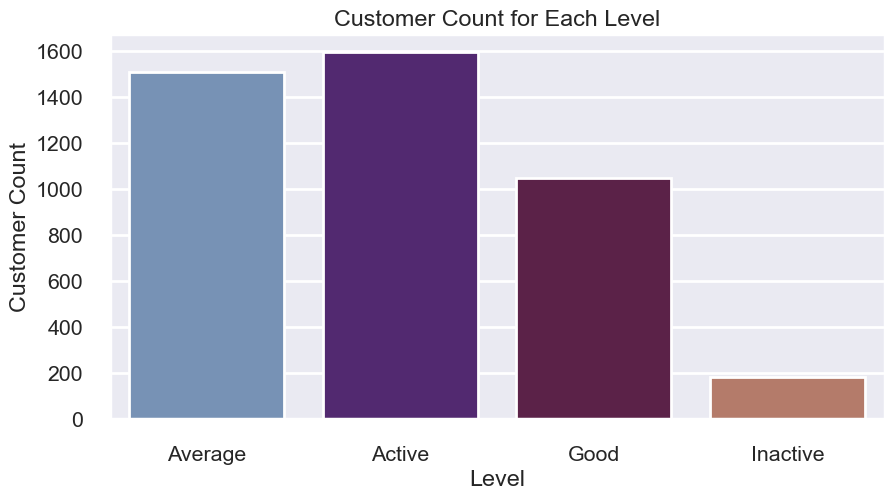

In [217]:
# Number of customers for each level
'''plt.figure(figsize=(10,5))
sns.set_context("poster", font_scale=0.7)
sns.set_palette('BuGn_r')
sns.countplot(rfm['level'])'''


# Number of customers for each level
plt.figure(figsize=(10, 5))
sns.set_context("poster", font_scale=0.7)
sns.countplot(x=rfm['level'], palette='twilight')

# Customize the plot
plt.title('Customer Count for Each Level')
plt.xlabel('Level')
plt.ylabel('Customer Count')

# Show the plot
plt.show()

In [218]:
# There are only few Inactive customers in the online retail store when compared to the other levels.
# It is good to notice that there are more number of Active customers.

In [219]:
# Analysing each level

In [220]:
rfm.groupby('level').agg({
    'recency' : ['mean', 'min','max'],
    'frequency' : ['mean', 'min','max'],
    'monetary' : ['mean','min','max','count']
})

recency           frequency              monetary                         
                mean  min  max      mean min  max         mean     min        max count
level                                                                                  
Active     23.652882    0  372  8.653509   1  209  4557.022701  201.12  280206.02  1596
Average   155.945033    1  373  1.269536   1    5   402.972590    3.75   77183.60  1510
Good       70.457143    0  366  2.497143   1    9   924.883696   36.56   44534.30  1050
Inactive  286.521978  182  373  1.000000   1    1   143.805934   30.60     239.49   182

In [221]:
# Active Customers
# 1596 customers bought 4575.62 units by shopping 9 times approximately every 23 days.
# They are previliged customers.
# Surprise offers can be given on birthdays and anniversary.

# Good Customers
# 1050 customers have bought 924.6488 units by shopping thrice every 70 days
# They are loyal customers.

# Average customers
# 1510 customers have bought approximately 402.97 units by shopping once every 156 days.
# Tiered pricing of products can be introduced.

# Inactive customers
# 182 customers have bought approximately 143.80 units by shopping once every 287 days.
# Personalised emails and SMS can be sent to the customers regarding the offers.
# More marketing strategies can be introduced to improve the frequency of orders.

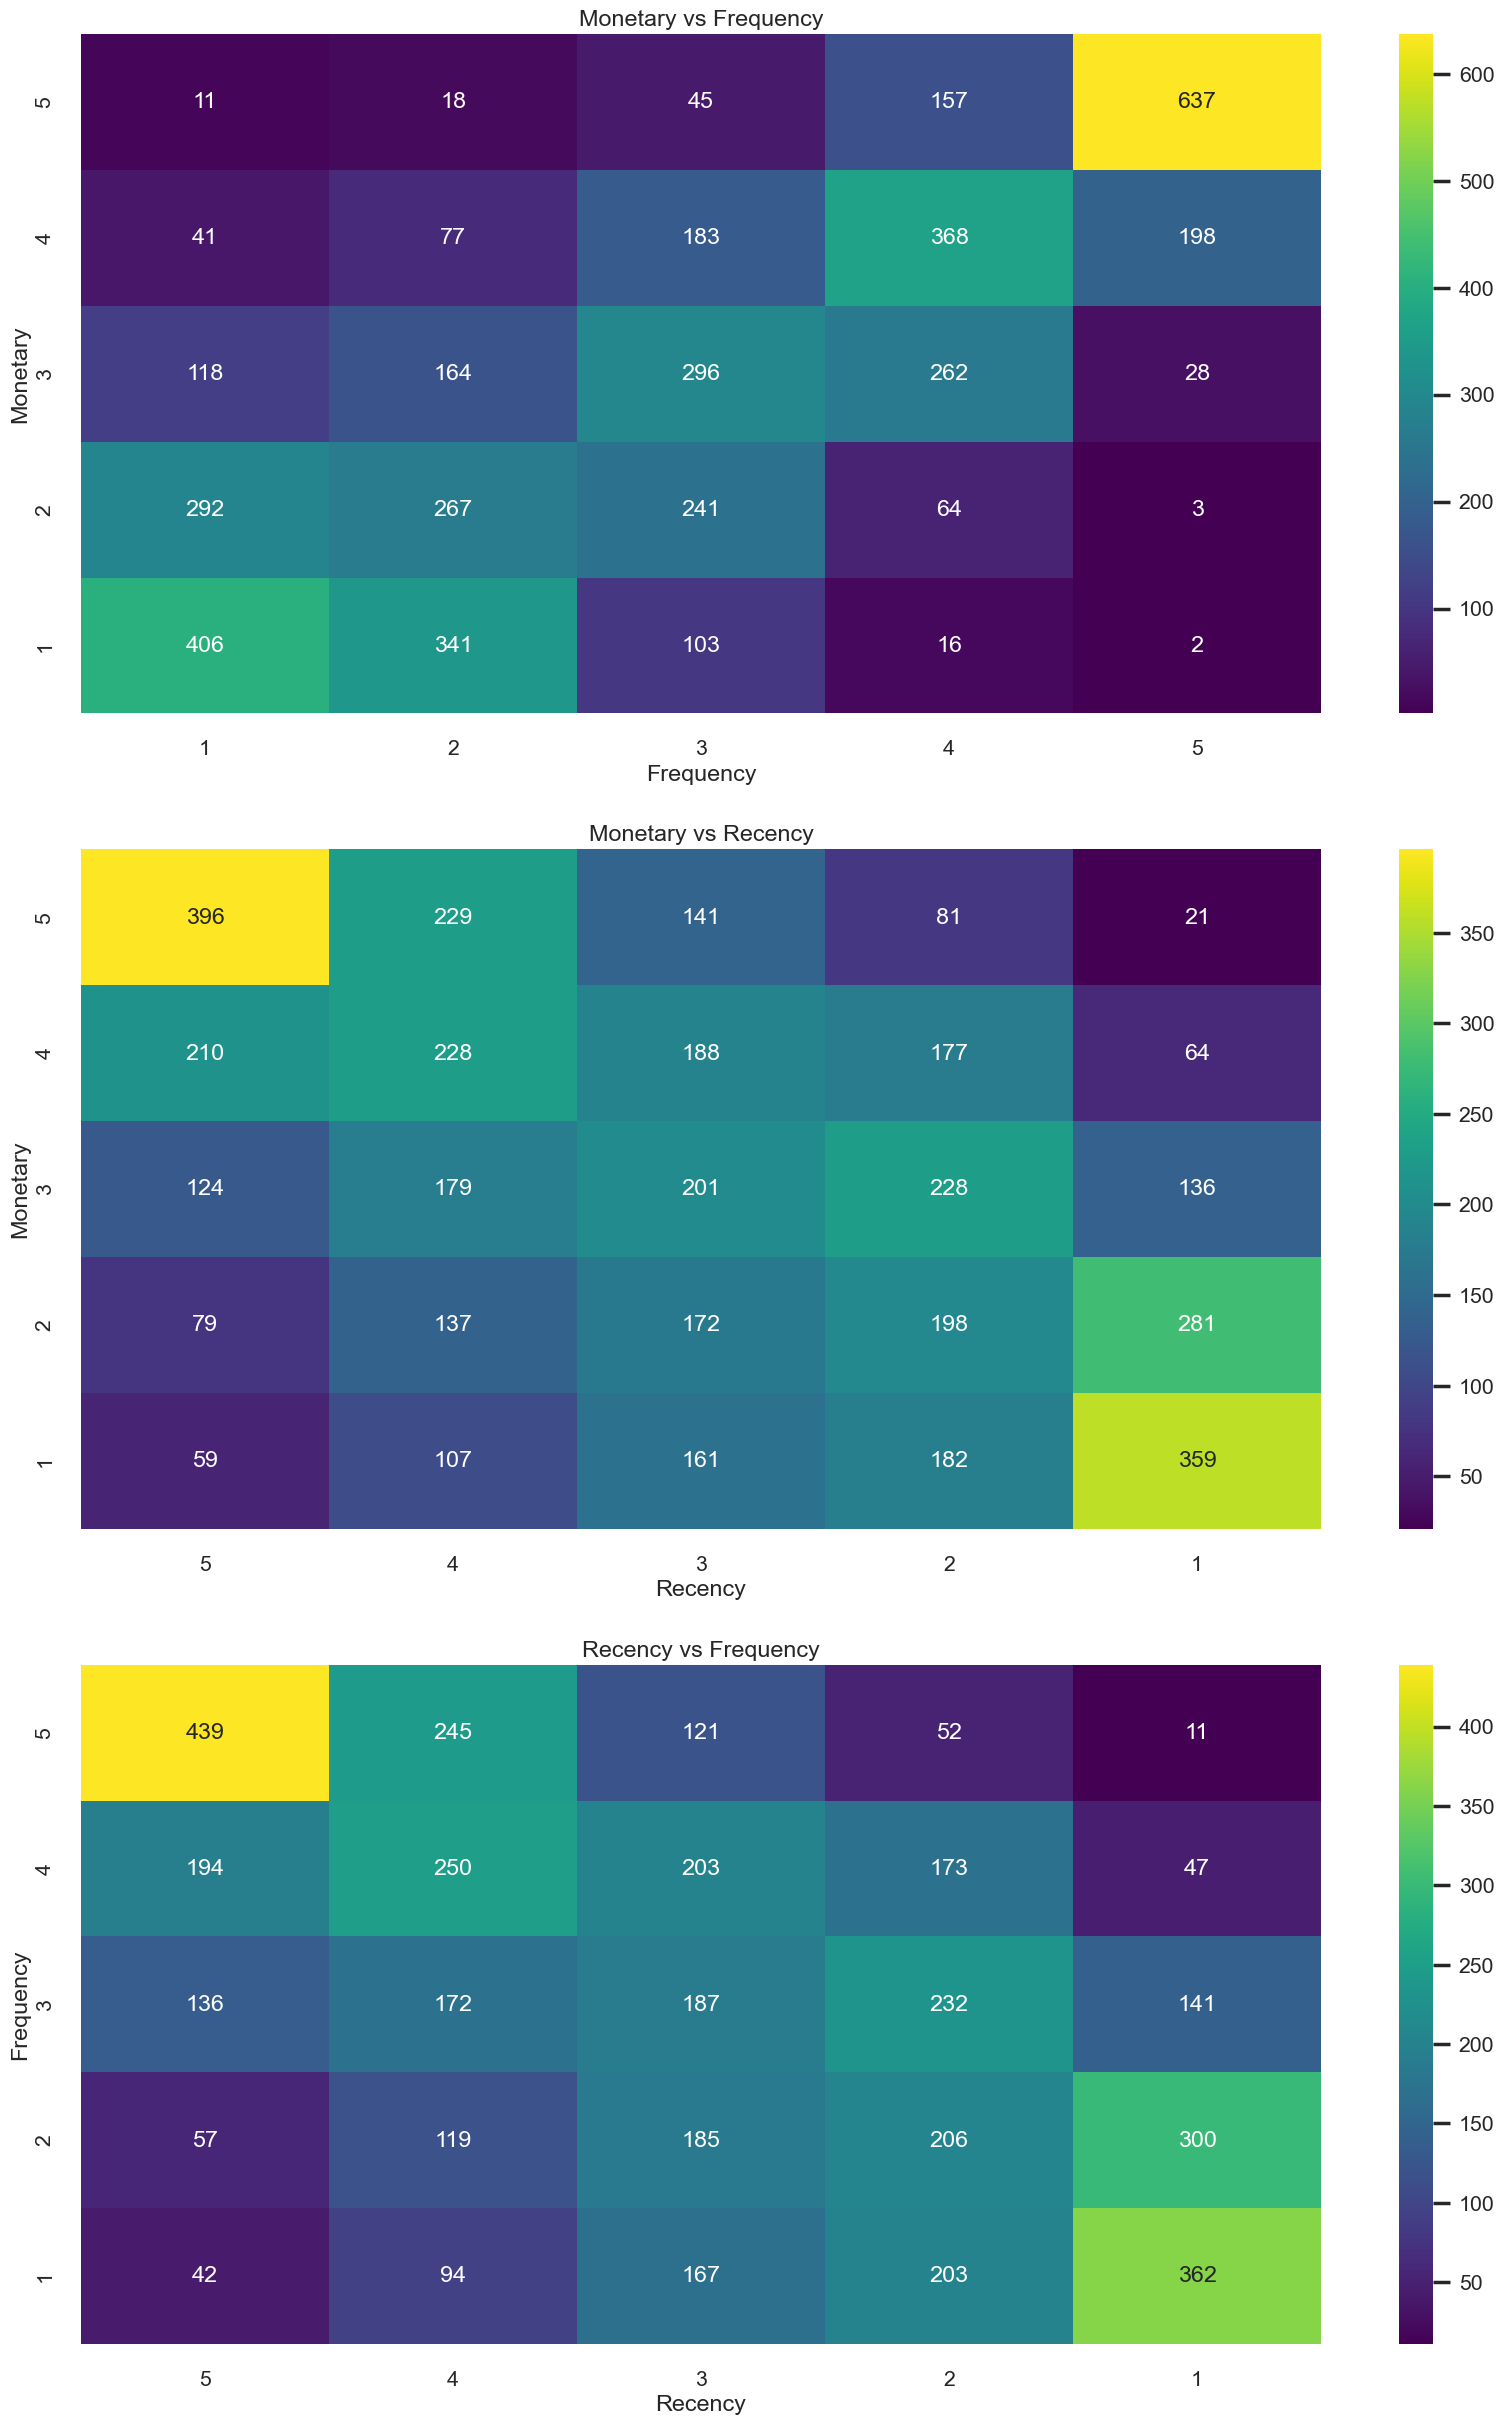

In [222]:
cross_table1 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['frequency_score'])
cross_table2 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['recency_score'])
cross_table3 = pd.crosstab(index=rfm['frequency_score'], columns=rfm['recency_score'])
plt.figure(figsize=(20,30))
plt.subplot(311)
ax1 = sns.heatmap(cross_table1, cmap='viridis', annot=True, fmt=".0f")
ax1.invert_yaxis()
ax1.set_ylabel('Monetary')
ax1.set_xlabel('Frequency')
ax1.set_title('Monetary vs Frequency')
plt.subplot(312)
ax2 = sns.heatmap(cross_table2, cmap='viridis', annot=True, fmt=".0f")
ax2.invert_yaxis()
ax2.set_ylabel('Monetary')
ax2.set_xlabel('Recency')
ax2.set_title('Monetary vs Recency')
plt.subplot(313)
ax3 = sns.heatmap(cross_table3, cmap='viridis', annot=True, fmt=".0f")
ax3.invert_yaxis()
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Recency')
ax3.set_title('Recency vs Frequency')
plt.show()

In [233]:
# Conclusion:
# The provided plots display heatmaps representing the relationships between monetary, frequency, and recency scores. 
# Each cell in the heatmap represents the count of observations falling into specific combinations of scores. 
# Monetary vs Frequency (Top Plot):
    # There's a positive correlation between monetary and frequency scores, suggesting that customers with higher monetary scores 
        # tend to have higher frequency scores.
    # The heatmap shows a diagonal pattern, indicating that as monetary scores increase, frequency scores also tend to increase.

# Monetary vs Recency (Middle Plot):
    # The heatmap shows a less clear pattern in the relationship between monetary and recency scores.
    # It seems there isn't a strong correlation between monetary and recency scores, as there is no distinct diagonal pattern.

# Recency vs Frequency (Bottom Plot):
    # There's an inverse relationship between recency and frequency scores. Higher recency scores (indicating less recent transactions) 
        # tend to be associated with lower frequency scores.
    # The heatmap shows a diagonal pattern, suggesting that as recency scores increase, frequency scores tend to decrease.

In [223]:
# Segmenting customers based on their levels

In [224]:
active = rfm[rfm['level'] == 'Active']
average = rfm[rfm['level'] == 'Average']
good = rfm[rfm['level'] == 'Good']
inactive = rfm[rfm['level'] == 'Inactive']

In [225]:
# We can save the customers in separate files, so that it will be easy for the company to send relevent offers and messages 
# to group of customers who belong to the same segment.

In [226]:
# RFM Clustering
# Applying unsupervised machine learning to identify different groups/clusters based on segmentation of customers according 
# to their purchasing behaviour.
# The overall clusters will be based on the 3 factors - recency, frequency and monetary values

In [227]:
rfm.describe()

,recency,frequency,monetary,score
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,92.059474,4.272015,2046.749056,9.006455
std,100.012264,7.697998,8981.618257,3.589298
min,0.000000,1.000000,3.750000,3.000000
25%,17.000000,1.000000,306.482500,6.000000
50%,50.000000,2.000000,668.570000,9.000000
75%,141.750000,5.000000,1660.597500,12.000000
max,373.000000,209.000000,280206.020000,15.000000


In [228]:
# There is no negative value in the dataset.

In [229]:
# Checking outliers

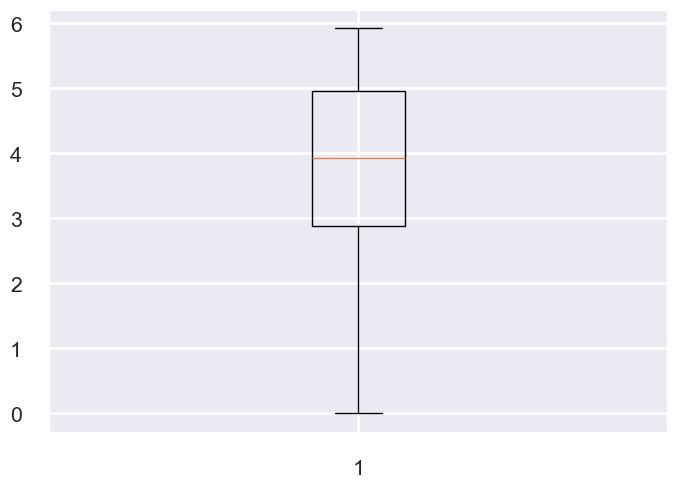

In [230]:
'''# Outlier treatment for recency
plt.boxplot(rfm.recency)
Q1 = rfm.recency.quantile(0.25)
Q3 = rfm.recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.recency >= Q1 - 1.5*IQR) & (rfm.recency <= Q3 + 1.5*IQR)]'''

# Outlier treatment for recency with log-scale
plt.boxplot(np.log1p(rfm.recency))  # Applying log transformation
Q1 = np.log1p(rfm.recency).quantile(0.25)
Q3 = np.log1p(rfm.recency).quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(np.log1p(rfm.recency) >= Q1 - 1.5*IQR) & (np.log1p(rfm.recency) <= Q3 + 1.5*IQR)]

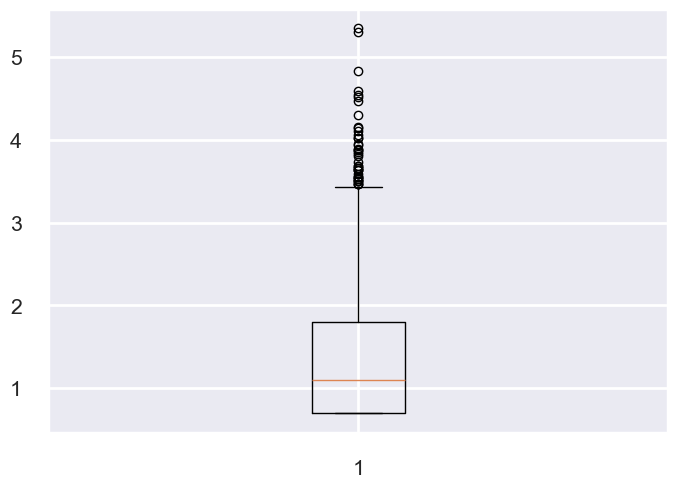

In [231]:
'''# Outlier treatment for frequency
plt.boxplot(rfm.frequency)
Q1 = rfm.frequency.quantile(0.25)
Q3 = rfm.frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.frequency >= Q1 - 1.5*IQR) & (rfm.frequency <= Q3 + 1.5*IQR)]'''

# Outlier treatment for frequency with log-scale
plt.boxplot(np.log1p(rfm.frequency))  # Applying log transformation
Q1 = np.log1p(rfm.frequency).quantile(0.25)
Q3 = np.log1p(rfm.frequency).quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(np.log1p(rfm.frequency) >= Q1 - 1.5*IQR) & (np.log1p(rfm.frequency) <= Q3 + 1.5*IQR)]


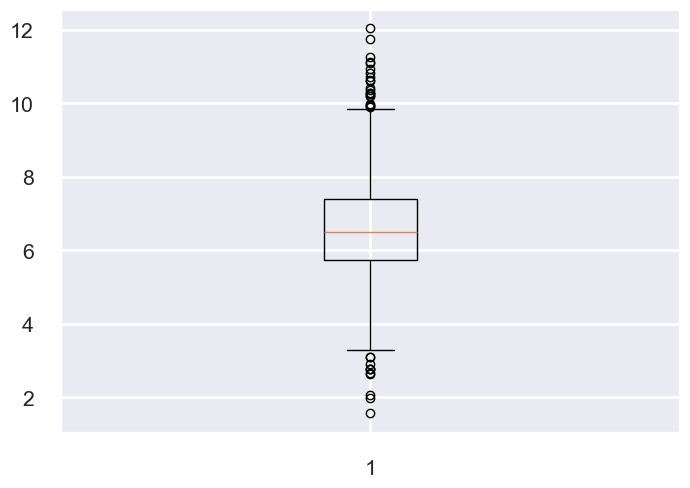

In [232]:
'''# Outlier treatment for monetary
plt.boxplot(rfm.monetary)
Q1 = rfm.monetary.quantile(0.25)
Q3 = rfm.monetary.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.monetary >= (Q1 - 1.5*IQR)) & (rfm.monetary <= (Q3 + 1.5*IQR))]'''

# Outlier treatment for monetary with log-scale
plt.boxplot(np.log1p(rfm.monetary))  # Applying log transformation
Q1 = np.log1p(rfm.monetary).quantile(0.25)
Q3 = np.log1p(rfm.monetary).quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(np.log1p(rfm.monetary) >= Q1 - 1.5*IQR) & (np.log1p(rfm.monetary) <= Q3 + 1.5*IQR)]


In [441]:
# KMeans

In [442]:
# Transforming the data
rfm1=rfm[['recency','frequency','monetary']]
scaler = StandardScaler()
x_scaled=scaler.fit(rfm1)
x_scaled = scaler.fit_transform(rfm1)
x_scaled

array([[-0.18004564,  0.61299161,  1.40715207],
       [-0.8172712 , -0.83040144,  1.35052482],
       [ 2.44711237, -0.83040144, -0.67993796],
       ...,
       [ 0.99379092, -0.83040144, -1.04173029],
       [-0.94024456, -0.34927042, -0.90300851],
       [-0.5489657 ,  0.1318606 ,  1.46427867]])

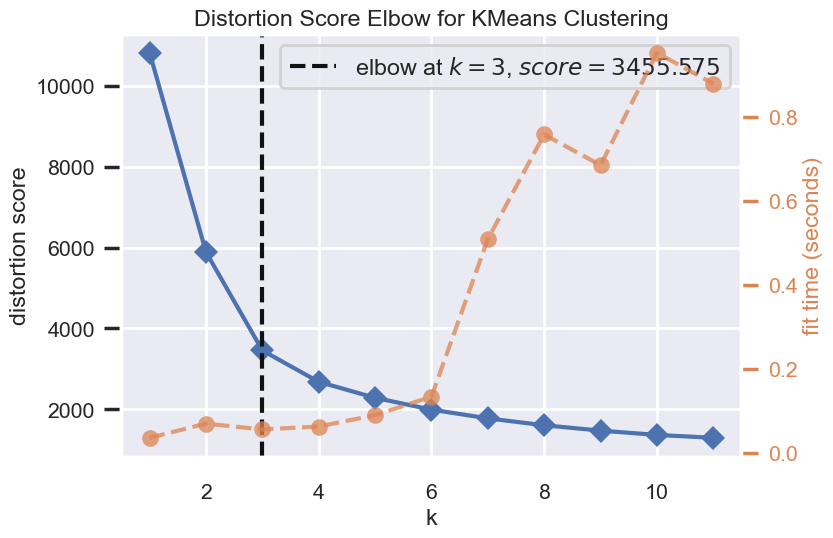

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [443]:
#  Elbow method
# Determine the number of clusters using Elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x_scaled)  
visualizer.show()

In [444]:
# According to the Elbow method, the number of clusters is 3.

[1 1 0 ... 0 0 1]
 Our cluster centers are as follows
[[-0.47013189 -0.33542124 -0.36317567]
 [-0.60892049  1.42405779  1.47429794]
 [ 1.52190656 -0.59460485 -0.58268838]]


,recency,frequency,monetary
cluster_pred,,,
0,1877,1877,1877
1,820,820,820
2,908,908,908


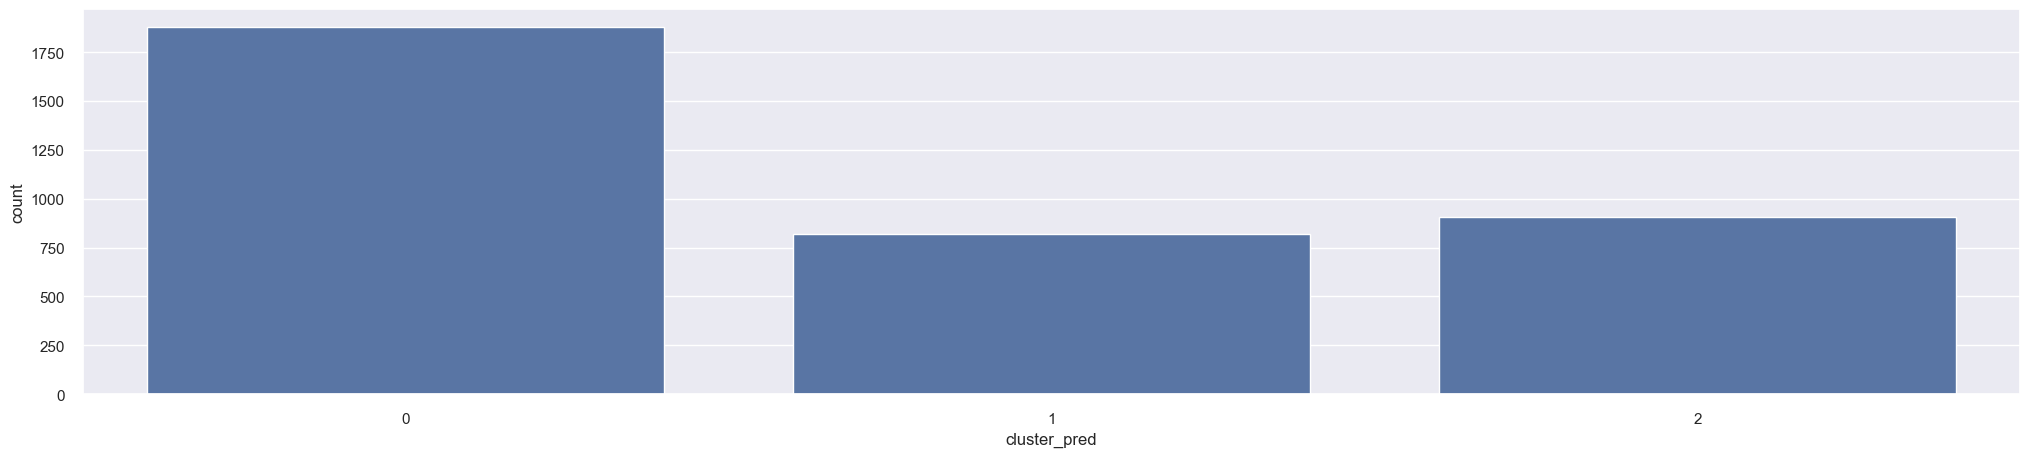

In [445]:
# Applying K-Means
kmeans_scaled = KMeans(3)
kmeans_scaled.fit(x_scaled)
identified_clusters = kmeans_scaled.fit_predict(rfm1)
clusters_scaled = rfm1.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
print(identified_clusters)
sns.set(style="darkgrid")
print(" Our cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

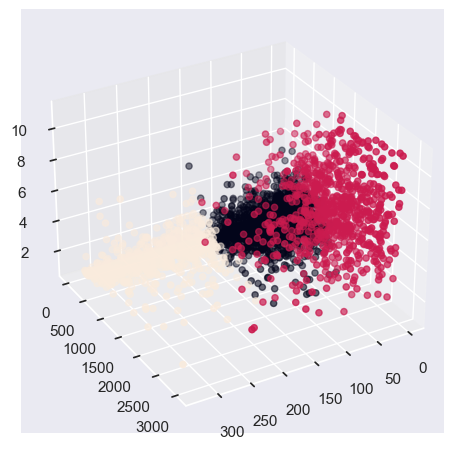

In [446]:
# Visualizing the clusters
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=clusters_scaled['recency']
yline=clusters_scaled['frequency']
zline=clusters_scaled['monetary']

ax.scatter3D(xline, zline,yline,c=clusters_scaled['cluster_pred'])
ax.view_init(30, 60)

Silhouette Score: 0.453


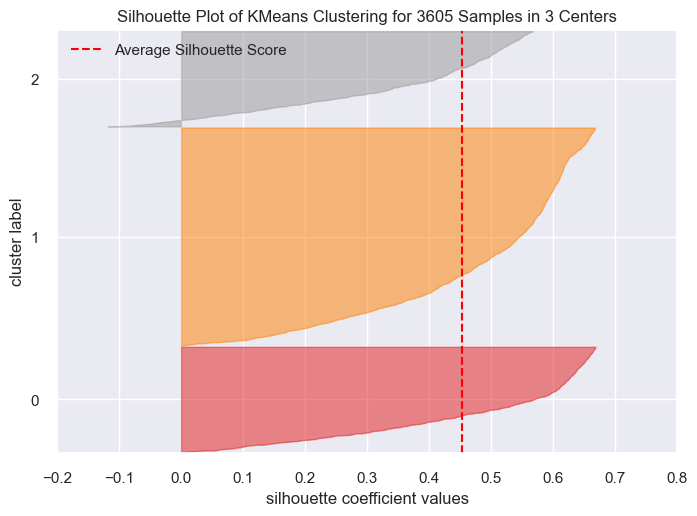

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3605 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [447]:
# Validation
# Using Silhoutte score to validate the clusters
from sklearn.metrics import silhouette_samples, silhouette_score
sil_score = silhouette_score(x_scaled, kmeans_scaled.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(x_scaled)   
visualizer.poof()

In [448]:
# Cluster Profiling
rfm1['cluster']= clusters_scaled['cluster_pred']
rfm1['level']=rfm['level']

rfm1.groupby('cluster').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})

/var/folders/c4/tjn2zmld3x5g9_yb6901vq4m0000gn/T/ipykernel_5795/3205256526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm1['cluster']= clusters_scaled['cluster_pred']
/var/folders/c4/tjn2zmld3x5g9_yb6901vq4m0000gn/T/ipykernel_5795/3205256526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm1['level']=rfm['level']


recency           frequency             monetary                       
               mean  min  max      mean min max         mean     min      max count
cluster                                                                            
0         49.029835    0  157  2.029835   1   6   556.724892    6.20  2062.06  1877
1         36.671951    0  235  5.687805   1  11  1845.171695  201.12  3029.87   820
2        227.240088  129  326  1.490088   1   7   402.562170    3.75  2661.24   908

In [449]:
# Cluster 0 is the most valuable group of customers with highest mean frequency (purchase most often), 
# least mean recency (has recently purchased from the company) and the highest mean monetary (high purchasing amount).
# On the other hand, Cluster 2 is the group of customers with least frequency and monetary and recency values.

In [450]:
rfm1.head()

,recency,frequency,monetary,cluster,level
CustomerID,,,,,
12348.0,75,4,1797.24,1,Good
12349.0,18,1,1757.55,0,Good
12350.0,310,1,334.40,2,Average
12352.0,36,8,2042.24,1,Active
12353.0,204,1,89.00,2,Inactive


In [451]:
# Nature of the cluster
# To check whether the predicted clusters are homogeneous or heterogeneous in nature.
rfm1.groupby(['cluster','level']).size()

cluster  level   
0        Active      313
         Average     733
         Good        831
1        Active      726
         Good         94
2        Average     669
         Good        103
         Inactive    136
dtype: int64

In [452]:
# Observations
# Cluster 1 is heterogenous in nature. It comprises Active, Average and Good customers.
# Cluster 0 is homogeneous in nature and has Active customers in majority.

In [453]:
# Comparing RFM analysis and Clusters
rfm_scaled=pd.DataFrame()
rfm_scaled=rfm1.copy()
scaler=StandardScaler()
rfm_scaled[['recency', 'frequency','monetary']] = scaler.fit_transform(rfm_scaled[['recency', 'frequency','monetary']])
rfm_scaled['cust_id']=rfm1.index

In [454]:
rfm_scaled.head()

,recency,frequency,monetary,cluster,level,cust_id
CustomerID,,,,,,
12348.0,-0.180046,0.612992,1.407152,1,Good,12348.0
12349.0,-0.817271,-0.830401,1.350525,0,Good,12349.0
12350.0,2.447112,-0.830401,-0.679938,2,Average,12350.0
12352.0,-0.616042,2.537516,1.756703,1,Active,12352.0
12353.0,1.262096,-0.830401,-1.030060,2,Inactive,12353.0


In [455]:
# Melting the dataframe
rfm_melted = pd.melt(frame= rfm_scaled, id_vars= ['cust_id', 'level', 'cluster'], var_name = 'metrics', value_name = 'value')
rfm_melted.head()

,cust_id,level,cluster,metrics,value
0,12348.0,Good,1,recency,-0.180046
1,12349.0,Good,0,recency,-0.817271
2,12350.0,Average,2,recency,2.447112
3,12352.0,Active,1,recency,-0.616042
4,12353.0,Inactive,2,recency,1.262096


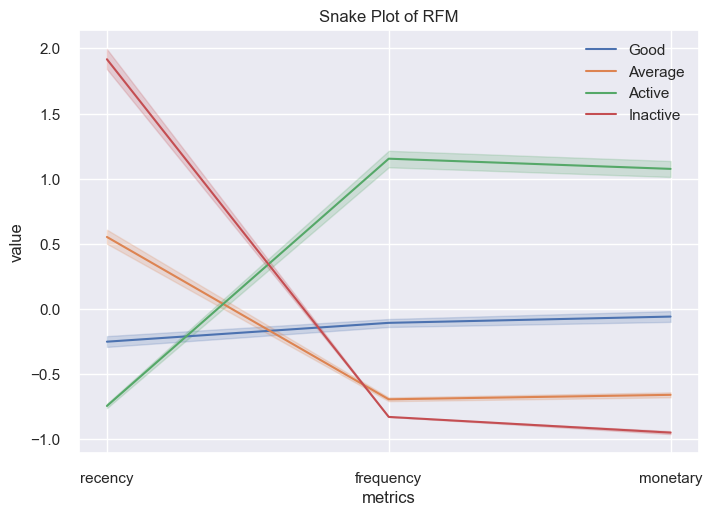

In [456]:
# Snake plot based on RFM segmentation
sns.lineplot(x = 'metrics', y = 'value', hue = 'level', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

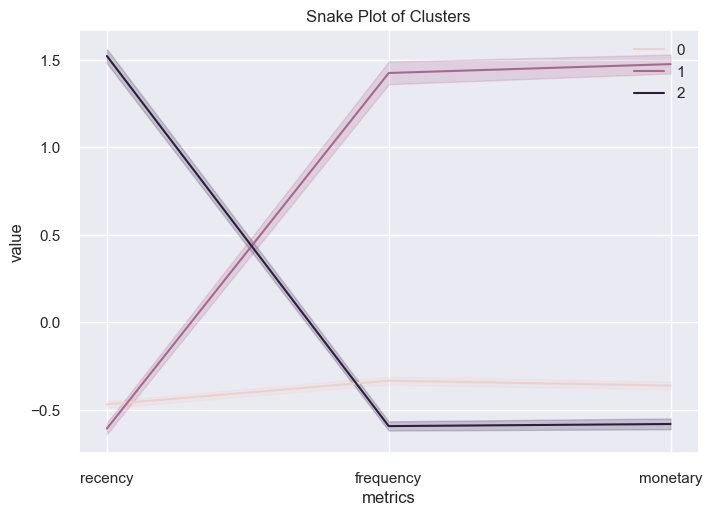

In [457]:
# Snake plot with clusters using K-Means
sns.lineplot(x = 'metrics', y = 'value', hue = 'cluster', data = rfm_melted)
plt.title('Snake Plot of Clusters')
plt.legend(loc = 'upper right')

In [458]:
# Conclusion
# I made two kinds of segmentation, RFM quantiles and K-Means clustering methods.
# Customers have been categorized into 4 buckets based on Recency, Frequency and Monetary value of their purchases. 
# Targeted strategy to be applied for each customer segment.

# With the result,
# I figured out ‘best’ customers, the most profitable group.
# This also tells us on which customer group we should focus on and to whom to give special offers or promotions among the customers.
# We can select the best communication channel for each segment and improve new marketing strategies.

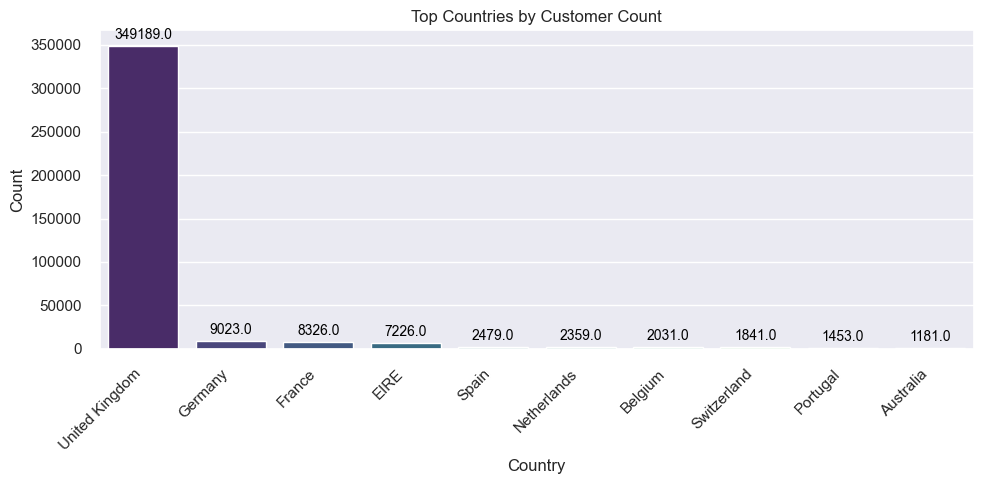

In [459]:
# Country dirstribution
# Select the top N countries based on count
top_countries = df_customers['Country'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")

# Display values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize plot
plt.title('Top Countries by Customer Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [234]:
# Most Customers come from UK

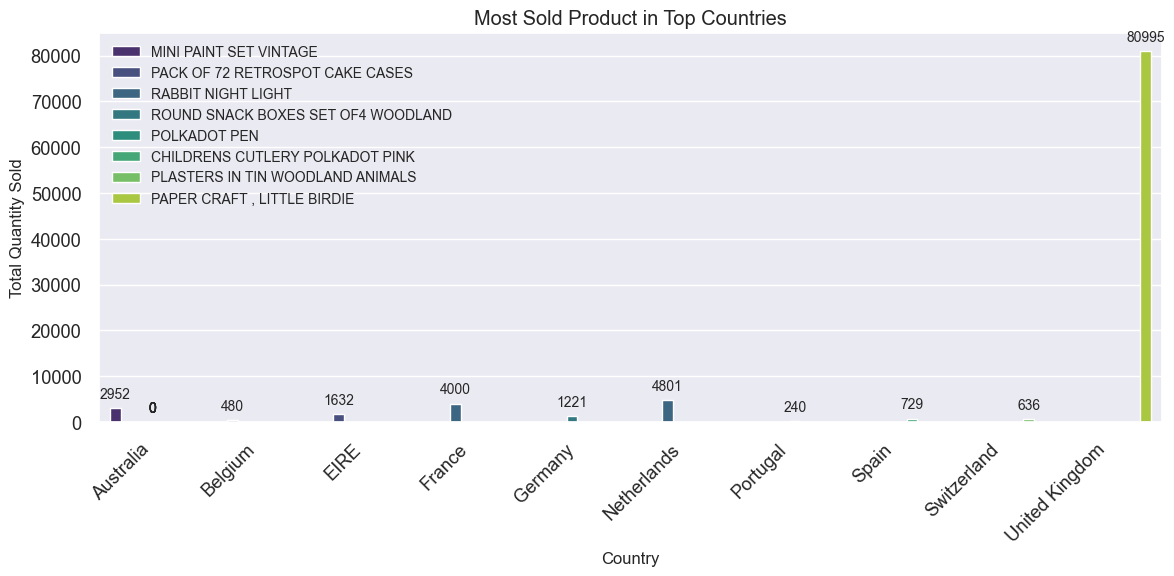

In [460]:
# The most sold products in top countries
# Select the top N countries based on count
top_countries = df_customers['Country'].value_counts().nlargest(10).index

# Filter the dataset for the top countries
filtered_df = df_customers[df_customers['Country'].isin(top_countries)]

# Group by 'Country', 'StockCode', and 'Description', sum the 'Quantity' for each product
top_selling_products = filtered_df.groupby(['Country', 'StockCode', 'Description'])['Quantity'].sum().reset_index()

# Find the most sold product in each country
most_sold_in_each_country = top_selling_products.loc[top_selling_products.groupby('Country')['Quantity'].idxmax()]
sns.set(font_scale=1.2, style="darkgrid")
bar_width = 0.8
# Plot the most sold product in each country
plt.figure(figsize=(12, 6))
#sns.barplot(x='Country', y='Quantity', hue='Description', data=most_sold_in_each_country, palette="viridis", dodge=True)

ax = sns.barplot(x='Country', y='Quantity', hue='Description', data=most_sold_in_each_country, palette="viridis", dodge=True)

# Add quantity values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)


# Customize plot
plt.title('Most Sold Product in Top Countries')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(fontsize=10)  # Adjust legend font size
plt.tight_layout()
plt.show()


# Dashboard